<a href="https://www.kaggle.com/code/lalit7881/heart-disease-prediction?scriptVersionId=295222464" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency

print("Libraries loaded successfully.")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Libraries loaded successfully.
/kaggle/input/playground-series-s6e2/sample_submission.csv
/kaggle/input/playground-series-s6e2/train.csv
/kaggle/input/playground-series-s6e2/test.csv


## 🔹 1. Import Libraries & Load Data

In [2]:
train_df = pd.read_csv("/kaggle/input/playground-series-s6e2/train.csv")
test_df = pd.read_csv("/kaggle/input/playground-series-s6e2/test.csv")
submission_df = pd.read_csv("/kaggle/input/playground-series-s6e2/sample_submission.csv")

## 🔹 2. Basic Inspection (Must-Do)

In [3]:
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

# Preview data
train_df.head()

Train shape: (630000, 15)
Test shape: (270000, 14)


,id,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,0,58,1,4,152,239,0,0,158,1,3.6,2,2,7,Presence
1,1,52,1,1,125,325,0,2,171,0,0.0,1,0,3,Absence
2,2,56,0,2,160,188,0,2,151,0,0.0,1,0,3,Absence
3,3,44,0,3,134,229,0,2,150,0,1.0,2,0,3,Absence
4,4,58,1,4,140,234,0,2,125,1,3.8,2,3,3,Presence


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630000 entries, 0 to 629999
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       630000 non-null  int64  
 1   Age                      630000 non-null  int64  
 2   Sex                      630000 non-null  int64  
 3   Chest pain type          630000 non-null  int64  
 4   BP                       630000 non-null  int64  
 5   Cholesterol              630000 non-null  int64  
 6   FBS over 120             630000 non-null  int64  
 7   EKG results              630000 non-null  int64  
 8   Max HR                   630000 non-null  int64  
 9   Exercise angina          630000 non-null  int64  
 10  ST depression            630000 non-null  float64
 11  Slope of ST              630000 non-null  int64  
 12  Number of vessels fluro  630000 non-null  int64  
 13  Thallium                 630000 non-null  int64  
 14  Hear

In [5]:
train_df.describe(include="all")

,id,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
count,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Absence
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,347546
mean,314999.500000,54.136706,0.714735,3.312752,130.497433,245.011814,0.079987,0.981660,152.816763,0.273725,0.716028,1.455871,0.451040,4.618873,NaN
std,181865.479132,8.256301,0.451541,0.851615,14.975802,33.681581,0.271274,0.998783,19.112927,0.445870,0.948472,0.545192,0.798549,1.950007,NaN
min,0.000000,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,NaN
25%,157499.750000,48.000000,0.000000,3.000000,120.000000,223.000000,0.000000,0.000000,142.000000,0.000000,0.000000,1.000000,0.000000,3.000000,NaN
50%,314999.500000,54.000000,1.000000,4.000000,130.000000,243.000000,0.000000,0.000000,157.000000,0.000000,0.100000,1.000000,0.000000,3.000000,NaN
75%,472499.250000,60.000000,1.000000,4.000000,140.000000,269.000000,0.000000,2.000000,166.000000,1.000000,1.400000,2.000000,1.000000,7.000000,NaN


## 🔹 3. Identify Target & ID Columns

In [6]:
target_col = "target"    
id_col = "id"            

print("Target:", target_col)
print("ID:", id_col)

Target: target
ID: id


## 🔹 4. Check Missing Values

In [7]:
train_df.isnull().sum().sort_values(ascending=False)

id                         0
Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [8]:
test_df.isnull().sum().sort_values(ascending=False)

id                         0
Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
dtype: int64

In [9]:
def preview_data(df, name):
    print("=" * 80)
    print(f"{name.upper()} - FIRST 5 ROWS")
    print("=" * 80)
    display(df.head())
    print("\n")

preview_data(train_df, "Train Data")
preview_data(test_df, "Test Data")
preview_data(submission_df, "Sample Submission")


TRAIN DATA - FIRST 5 ROWS


,id,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,0,58,1,4,152,239,0,0,158,1,3.6,2,2,7,Presence
1,1,52,1,1,125,325,0,2,171,0,0.0,1,0,3,Absence
2,2,56,0,2,160,188,0,2,151,0,0.0,1,0,3,Absence
3,3,44,0,3,134,229,0,2,150,0,1.0,2,0,3,Absence
4,4,58,1,4,140,234,0,2,125,1,3.8,2,3,3,Presence




TEST DATA - FIRST 5 ROWS


,id,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
0,630000,58,1,3,120,288,0,2,145,1,0.8,2,3,3
1,630001,55,0,2,120,209,0,0,172,0,0.0,1,0,3
2,630002,54,1,4,120,268,0,0,150,1,0.0,2,3,7
3,630003,44,0,3,112,177,0,0,168,0,0.9,1,0,3
4,630004,43,1,1,138,267,0,0,163,0,1.8,2,0,7




SAMPLE SUBMISSION - FIRST 5 ROWS


,id,Heart Disease
0,630000,0
1,630001,0
2,630002,0
3,630003,0
4,630004,0


In [10]:
print("=" * 80)
print("DATASET SHAPES")
print("=" * 80)
print("Train:", train_df.shape)
print("Test:", test_df.shape)
print("Submission:", submission_df.shape)


DATASET SHAPES
Train: (630000, 15)
Test: (270000, 14)
Submission: (270000, 2)


In [11]:
print("=" * 80)
print("TRAIN COLUMNS")
print("=" * 80)
display(train_df.columns)


TRAIN COLUMNS


Index(['id', 'Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol',
       'FBS over 120', 'EKG results', 'Max HR', 'Exercise angina',
       'ST depression', 'Slope of ST', 'Number of vessels fluro', 'Thallium',
       'Heart Disease'],
      dtype='object')

In [12]:
id_col = "id"
target_col = "target"

print("ID Column:", id_col)
print("Target Column:", target_col)


ID Column: id
Target Column: target


In [13]:
print("=" * 80)
print("MISSING VALUES - TRAIN")
print("=" * 80)
display(train_df.isnull().sum().sort_values(ascending=False))


MISSING VALUES - TRAIN


id                         0
Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [14]:
print("=" * 80)
print("DATA TYPES")
print("=" * 80)
display(train_df.dtypes)


DATA TYPES


id                           int64
Age                          int64
Sex                          int64
Chest pain type              int64
BP                           int64
Cholesterol                  int64
FBS over 120                 int64
EKG results                  int64
Max HR                       int64
Exercise angina              int64
ST depression              float64
Slope of ST                  int64
Number of vessels fluro      int64
Thallium                     int64
Heart Disease               object
dtype: object

In [15]:
TARGET = 'target'
ID_COL = 'id'

train = train_df.copy()
test = test_df.copy()

# Feature columns
train_cols = [col for col in train.columns if col not in [ID_COL, TARGET]]
test_cols = [col for col in test.columns if col != ID_COL]

print(f"Target Variable: {TARGET}")
print(f"Number of Features: {len(train_cols)}")

print("\nFeature List:")
for i, col in enumerate(train_cols, 1):
    print(f"  {i:2d}. {col}")


Target Variable: target
Number of Features: 14

Feature List:
   1. Age
   2. Sex
   3. Chest pain type
   4. BP
   5. Cholesterol
   6. FBS over 120
   7. EKG results
   8. Max HR
   9. Exercise angina
  10. ST depression
  11. Slope of ST
  12. Number of vessels fluro
  13. Thallium
  14. Heart Disease


In [16]:
CATS = train[train_cols].select_dtypes(include=['object', 'category']).columns.tolist()
NUMS = train[train_cols].select_dtypes(exclude=['object', 'category']).columns.tolist()

print(f"\n{'='*80}")
print(f"Categorical Features ({len(CATS)}):")
print(CATS)

print(f"\nNumerical Features ({len(NUMS)}):")
print(NUMS)



Categorical Features (1):
['Heart Disease']

Numerical Features (13):
['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120', 'EKG results', 'Max HR', 'Exercise angina', 'ST depression', 'Slope of ST', 'Number of vessels fluro', 'Thallium']


In [17]:
print("=" * 80)
print("DUPLICATE ROWS CHECK")
print("=" * 80)

train = train_df.copy()
test = test_df.copy()

train_duplicates = train.duplicated().sum()
test_duplicates = test.duplicated().sum()

print(f"Train Duplicates : {train_duplicates:,} ({train_duplicates / len(train) * 100:.2f}%)")
print(f"Test Duplicates  : {test_duplicates:,} ({test_duplicates / len(test) * 100:.2f}%)")


DUPLICATE ROWS CHECK
Train Duplicates : 0 (0.00%)
Test Duplicates  : 0 (0.00%)


In [18]:
train = train_df.copy()
test = test_df.copy()
submission = submission_df.copy()

# Identify numerical columns in train
NUMS = train.select_dtypes(exclude=['object', 'category']).columns.tolist()
print("=" * 80)
print("STATISTICAL SUMMARY - NUMERICAL FEATURES (TRAIN)")
print("=" * 80)

display(
    train[NUMS]
    .describe()
    .T
    .style
    .background_gradient(cmap="coolwarm")  # visually distinct
    .format("{:.2f}")
)

STATISTICAL SUMMARY - NUMERICAL FEATURES (TRAIN)


,count,mean,std,min,25%,50%,75%,max
id,630000.00,314999.50,181865.48,0.00,157499.75,314999.50,472499.25,629999.00
Age,630000.00,54.14,8.26,29.00,48.00,54.00,60.00,77.00
Sex,630000.00,0.71,0.45,0.00,0.00,1.00,1.00,1.00
Chest pain type,630000.00,3.31,0.85,1.00,3.00,4.00,4.00,4.00
BP,630000.00,130.50,14.98,94.00,120.00,130.00,140.00,200.00
Cholesterol,630000.00,245.01,33.68,126.00,223.00,243.00,269.00,564.00
FBS over 120,630000.00,0.08,0.27,0.00,0.00,0.00,0.00,1.00
EKG results,630000.00,0.98,1.00,0.00,0.00,0.00,2.00,2.00
Max HR,630000.00,152.82,19.11,71.00,142.00,157.00,166.00,202.00
Exercise angina,630000.00,0.27,0.45,0.00,0.00,0.00,1.00,1.00


In [19]:
print("\n" + "=" * 80)
print("STATISTICAL SUMMARY - NUMERICAL FEATURES (SUBMISSION)")
print("=" * 80)

# Only keep numerical columns in submission that exist in train NUMS
sub_nums = [col for col in NUMS if col in submission.columns]

if sub_nums:
    display(
        submission[sub_nums]
        .describe()
        .T
        .style
        .background_gradient(cmap="plasma")  # different color
        .format("{:.2f}")
    )
else:
    print("No numerical features in submission file to display.")


STATISTICAL SUMMARY - NUMERICAL FEATURES (SUBMISSION)


,count,mean,std,min,25%,50%,75%,max
id,270000.00,764999.50,77942.43,630000.00,697499.75,764999.50,832499.25,899999.00


In [20]:
train_df.columns


Index(['id', 'Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol',
       'FBS over 120', 'EKG results', 'Max HR', 'Exercise angina',
       'ST depression', 'Slope of ST', 'Number of vessels fluro', 'Thallium',
       'Heart Disease'],
      dtype='object')

## ✅ Train vs Submission

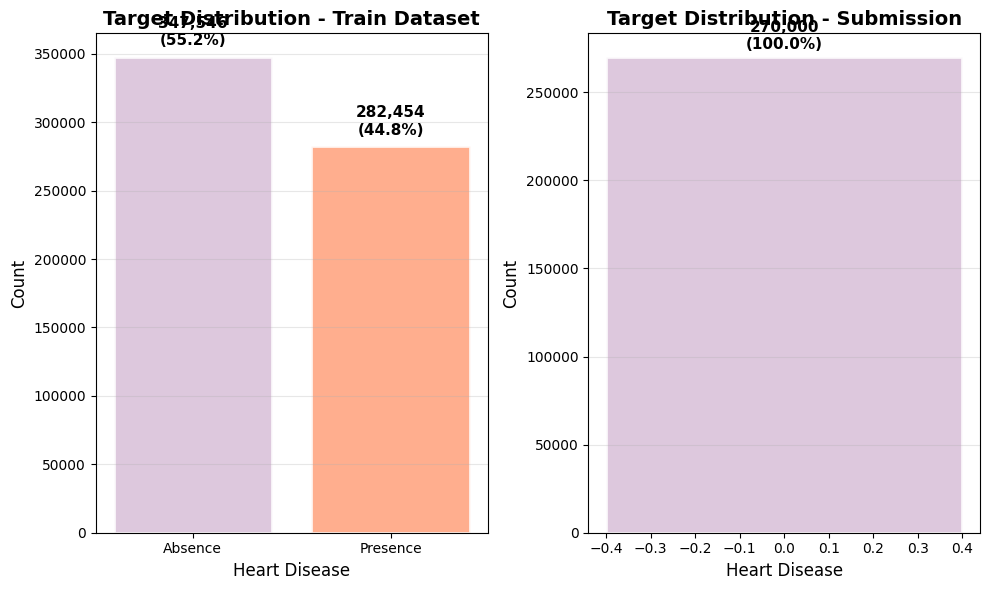

In [21]:
TARGET = 'Heart Disease'
ID_COL = 'id'

# Colors (light & vibrant)
COLORS = {
    'train_primary': '#D8BFD8',      # light purple
    'train_secondary': '#FFA07A',    # light red / coral
}

# ---------------- Target Counts ----------------
target_counts_train = train_df[TARGET].value_counts().sort_index()
colors_train = [COLORS['train_primary'], COLORS['train_secondary']]

# ---------------- Figure Setup ----------------
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

# ---------------- TRAIN TARGET ----------------
axes[0].bar(
    target_counts_train.index,
    target_counts_train.values,
    color=colors_train,
    alpha=0.85,
    edgecolor='white',
    linewidth=2
)
axes[0].set_title('Target Distribution - Train Dataset', fontsize=14, fontweight='bold')
axes[0].set_xlabel(TARGET, fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].grid(axis='y', alpha=0.3)

# Annotate counts + percentages
for i, (label, count) in enumerate(target_counts_train.items()):
    pct = count / len(train_df) * 100
    axes[0].text(
        i, count + len(train_df)*0.01,
        f'{count:,}\n({pct:.1f}%)',
        ha='center', va='bottom', fontsize=11, fontweight='bold'
    )

# ---------------- SUBMISSION TARGET ----------------
if TARGET in submission_df.columns:
    target_counts_sub = submission_df[TARGET].value_counts().sort_index()
    axes[1].bar(
        target_counts_sub.index,
        target_counts_sub.values,
        color=colors_train,
        alpha=0.85,
        edgecolor='white',
        linewidth=2
    )
    axes[1].set_title('Target Distribution - Submission', fontsize=14, fontweight='bold')
    axes[1].set_xlabel(TARGET, fontsize=12)
    axes[1].set_ylabel('Count', fontsize=12)
    axes[1].grid(axis='y', alpha=0.3)

    # Annotate counts + percentages
    for i, (label, count) in enumerate(target_counts_sub.items()):
        pct = count / len(submission_df) * 100
        axes[1].text(
            i, count + len(submission_df)*0.01,
            f'{count:,}\n({pct:.1f}%)',
            ha='center', va='bottom', fontsize=11, fontweight='bold'
        )
else:
    axes[1].text(0.5, 0.5, "No target in submission file", ha='center', va='center', fontsize=14)
    axes[1].set_title('Target Distribution - Submission', fontsize=14, fontweight='bold')
    axes[1].set_xticks([])
    axes[1].set_yticks([])

plt.tight_layout()
plt.show()

In [22]:
print("="*80)
print("CLASS BALANCE ANALYSIS")
print("="*80)
print(f"\nTrain Dataset:")
for label, count in target_counts_train.items():
    print(f"  {label}: {count:,} ({count/len(train_df)*100:.2f}%)")

imbalance_ratio = target_counts_train.max() / target_counts_train.min()
print(f"\nImbalance Ratio: {imbalance_ratio:.2f}:1")

if imbalance_ratio > 2.0:
    print("⚠⚠ Significant class imbalance detected. Consider SMOTE or class weights.")
elif imbalance_ratio > 1.5:
    print("⚠ Moderate class imbalance detected. Consider stratified CV and balanced metrics.")
else:
    print("✓ Classes are relatively balanced.")

CLASS BALANCE ANALYSIS

Train Dataset:
  Absence: 347,546 (55.17%)
  Presence: 282,454 (44.83%)

Imbalance Ratio: 1.23:1
✓ Classes are relatively balanced.


## ✅ Enhanced Numerical Feature Distributions

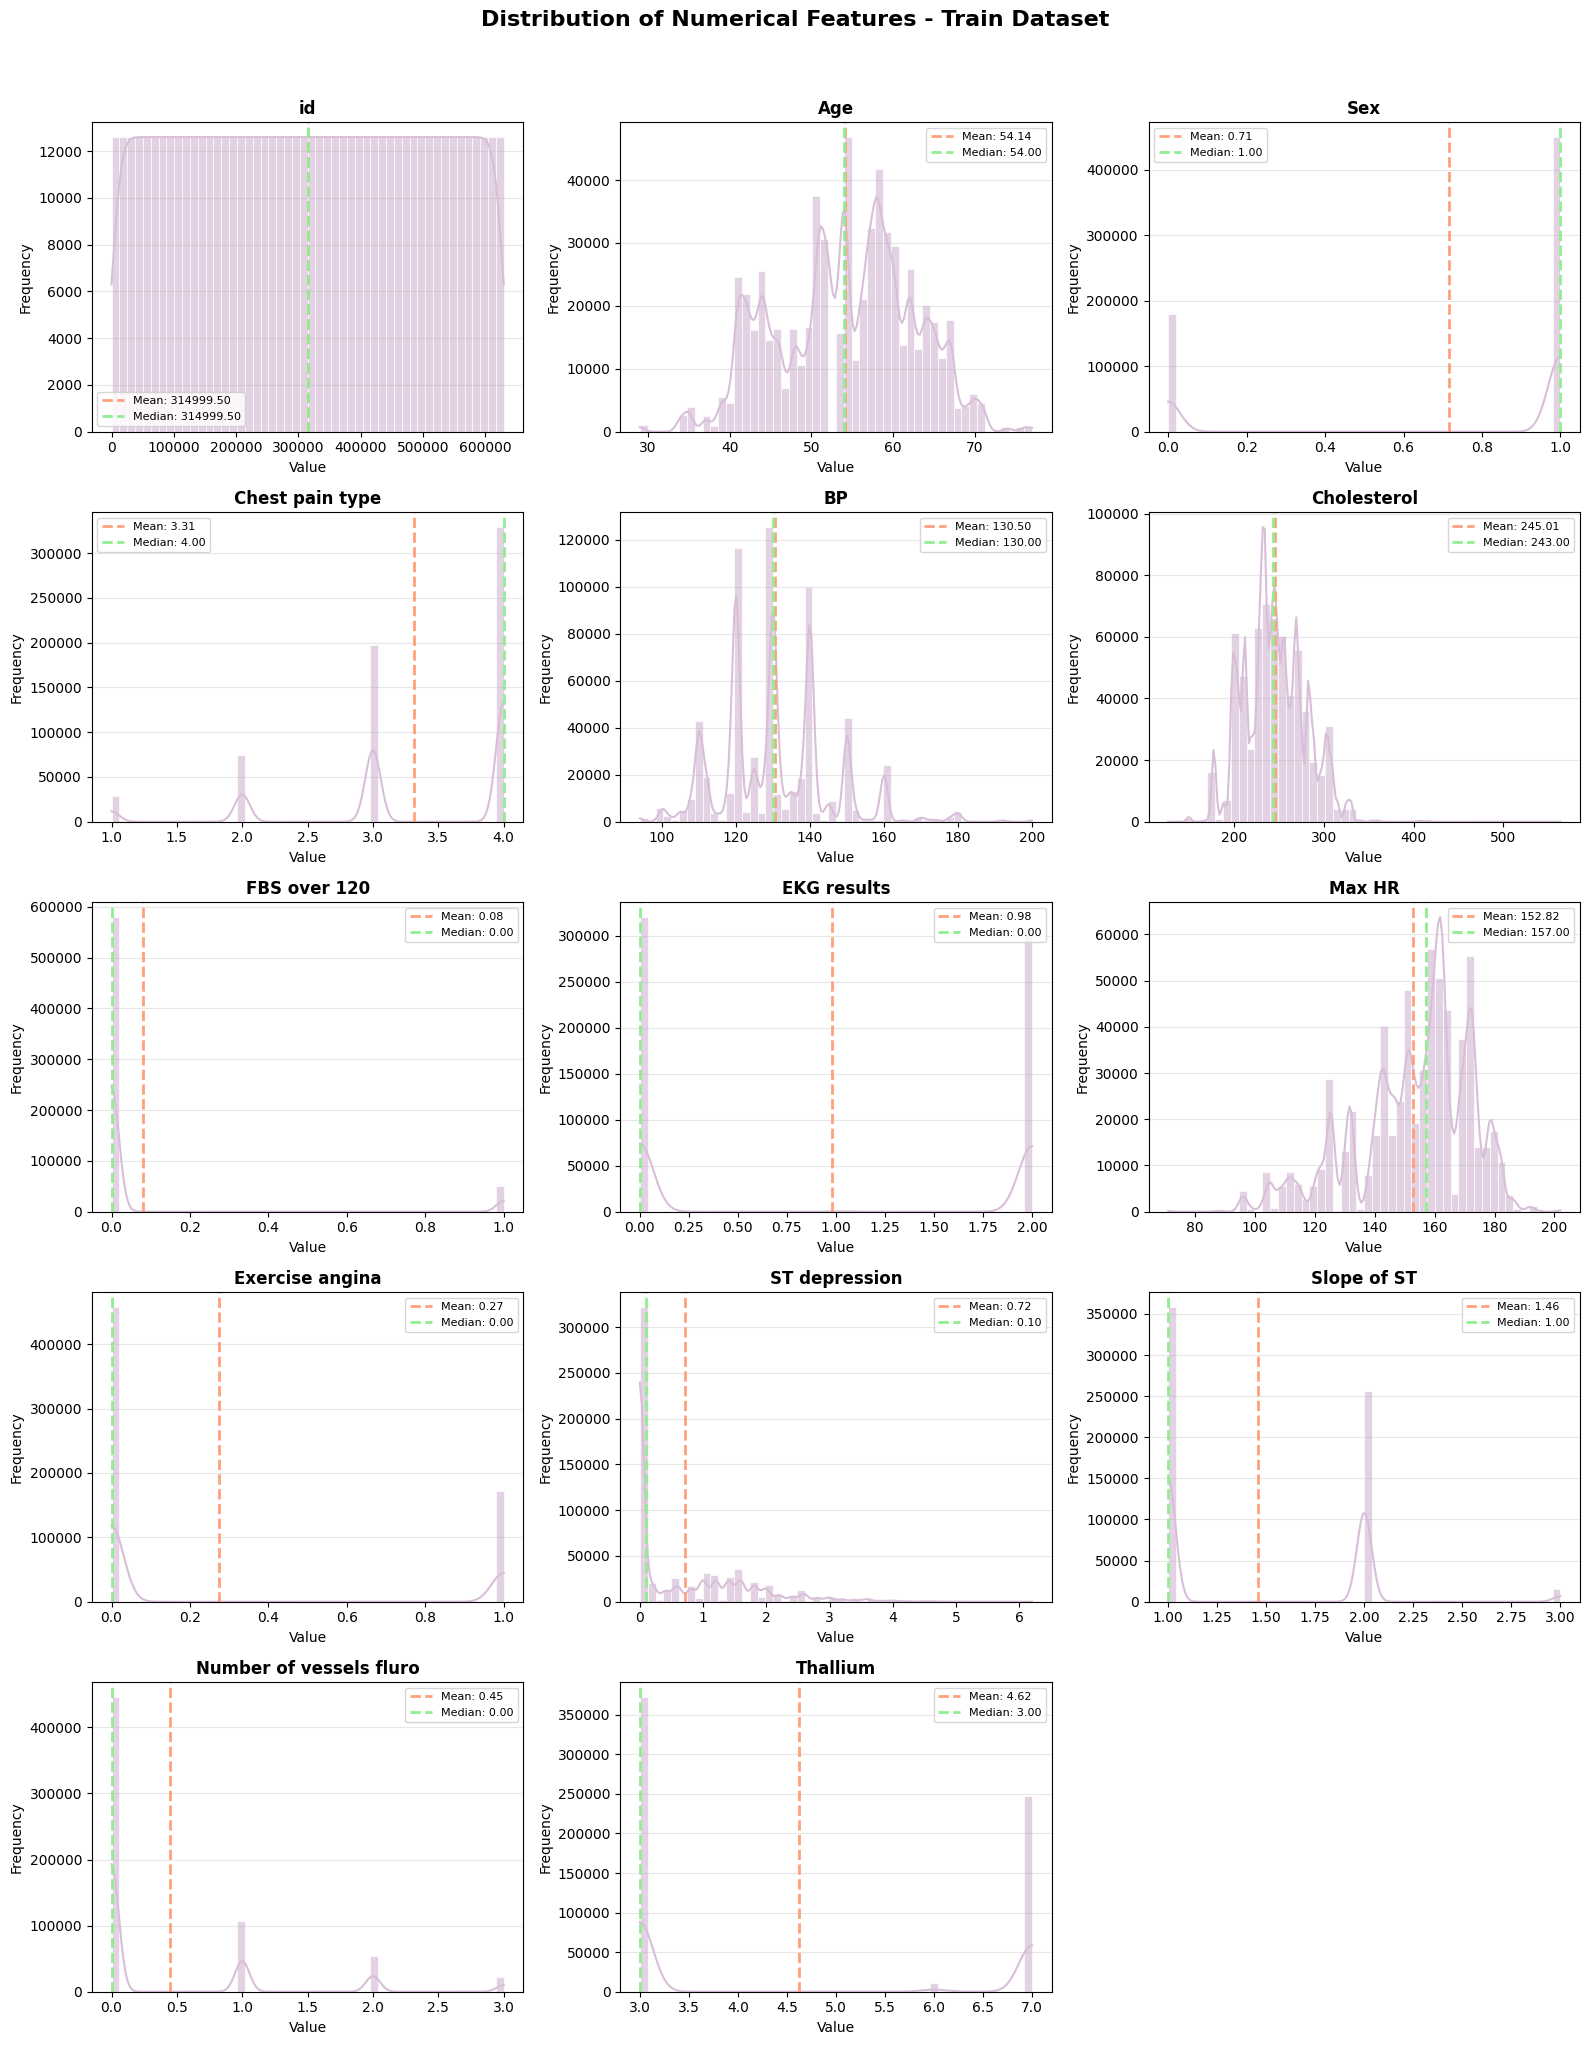

In [23]:
COLORS = {
    'primary': '#D8BFD8',    # light purple
    'secondary': '#FFA07A',  # light red / coral
    'accent': '#90EE90',     # light green
}

# ---------------- Layout ----------------
n_cols = 3
n_rows = (len(NUMS) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4 * n_rows))
axes = axes.flatten()

# ---------------- Plot Each Feature ----------------
for i, col in enumerate(NUMS):
    sns.histplot(train_df[col], bins=50, kde=True, ax=axes[i],
                 color=COLORS['primary'], edgecolor='white', alpha=0.7)
    
    # Mean & median lines
    mean_val = train_df[col].mean()
    median_val = train_df[col].median()
    axes[i].axvline(mean_val, color=COLORS['secondary'], linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    axes[i].axvline(median_val, color=COLORS['accent'], linestyle='--', linewidth=2, label=f'Median: {median_val:.2f}')
    
    # Titles & labels
    axes[i].set_title(f'{col}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('Value', fontsize=10)
    axes[i].set_ylabel('Frequency', fontsize=10)
    axes[i].grid(axis='y', alpha=0.3)
    axes[i].legend(fontsize=8)

# Turn off extra axes
for i in range(len(NUMS), len(axes)):
    axes[i].axis('off')

plt.suptitle('Distribution of Numerical Features - Train Dataset', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

## Outlier Detection

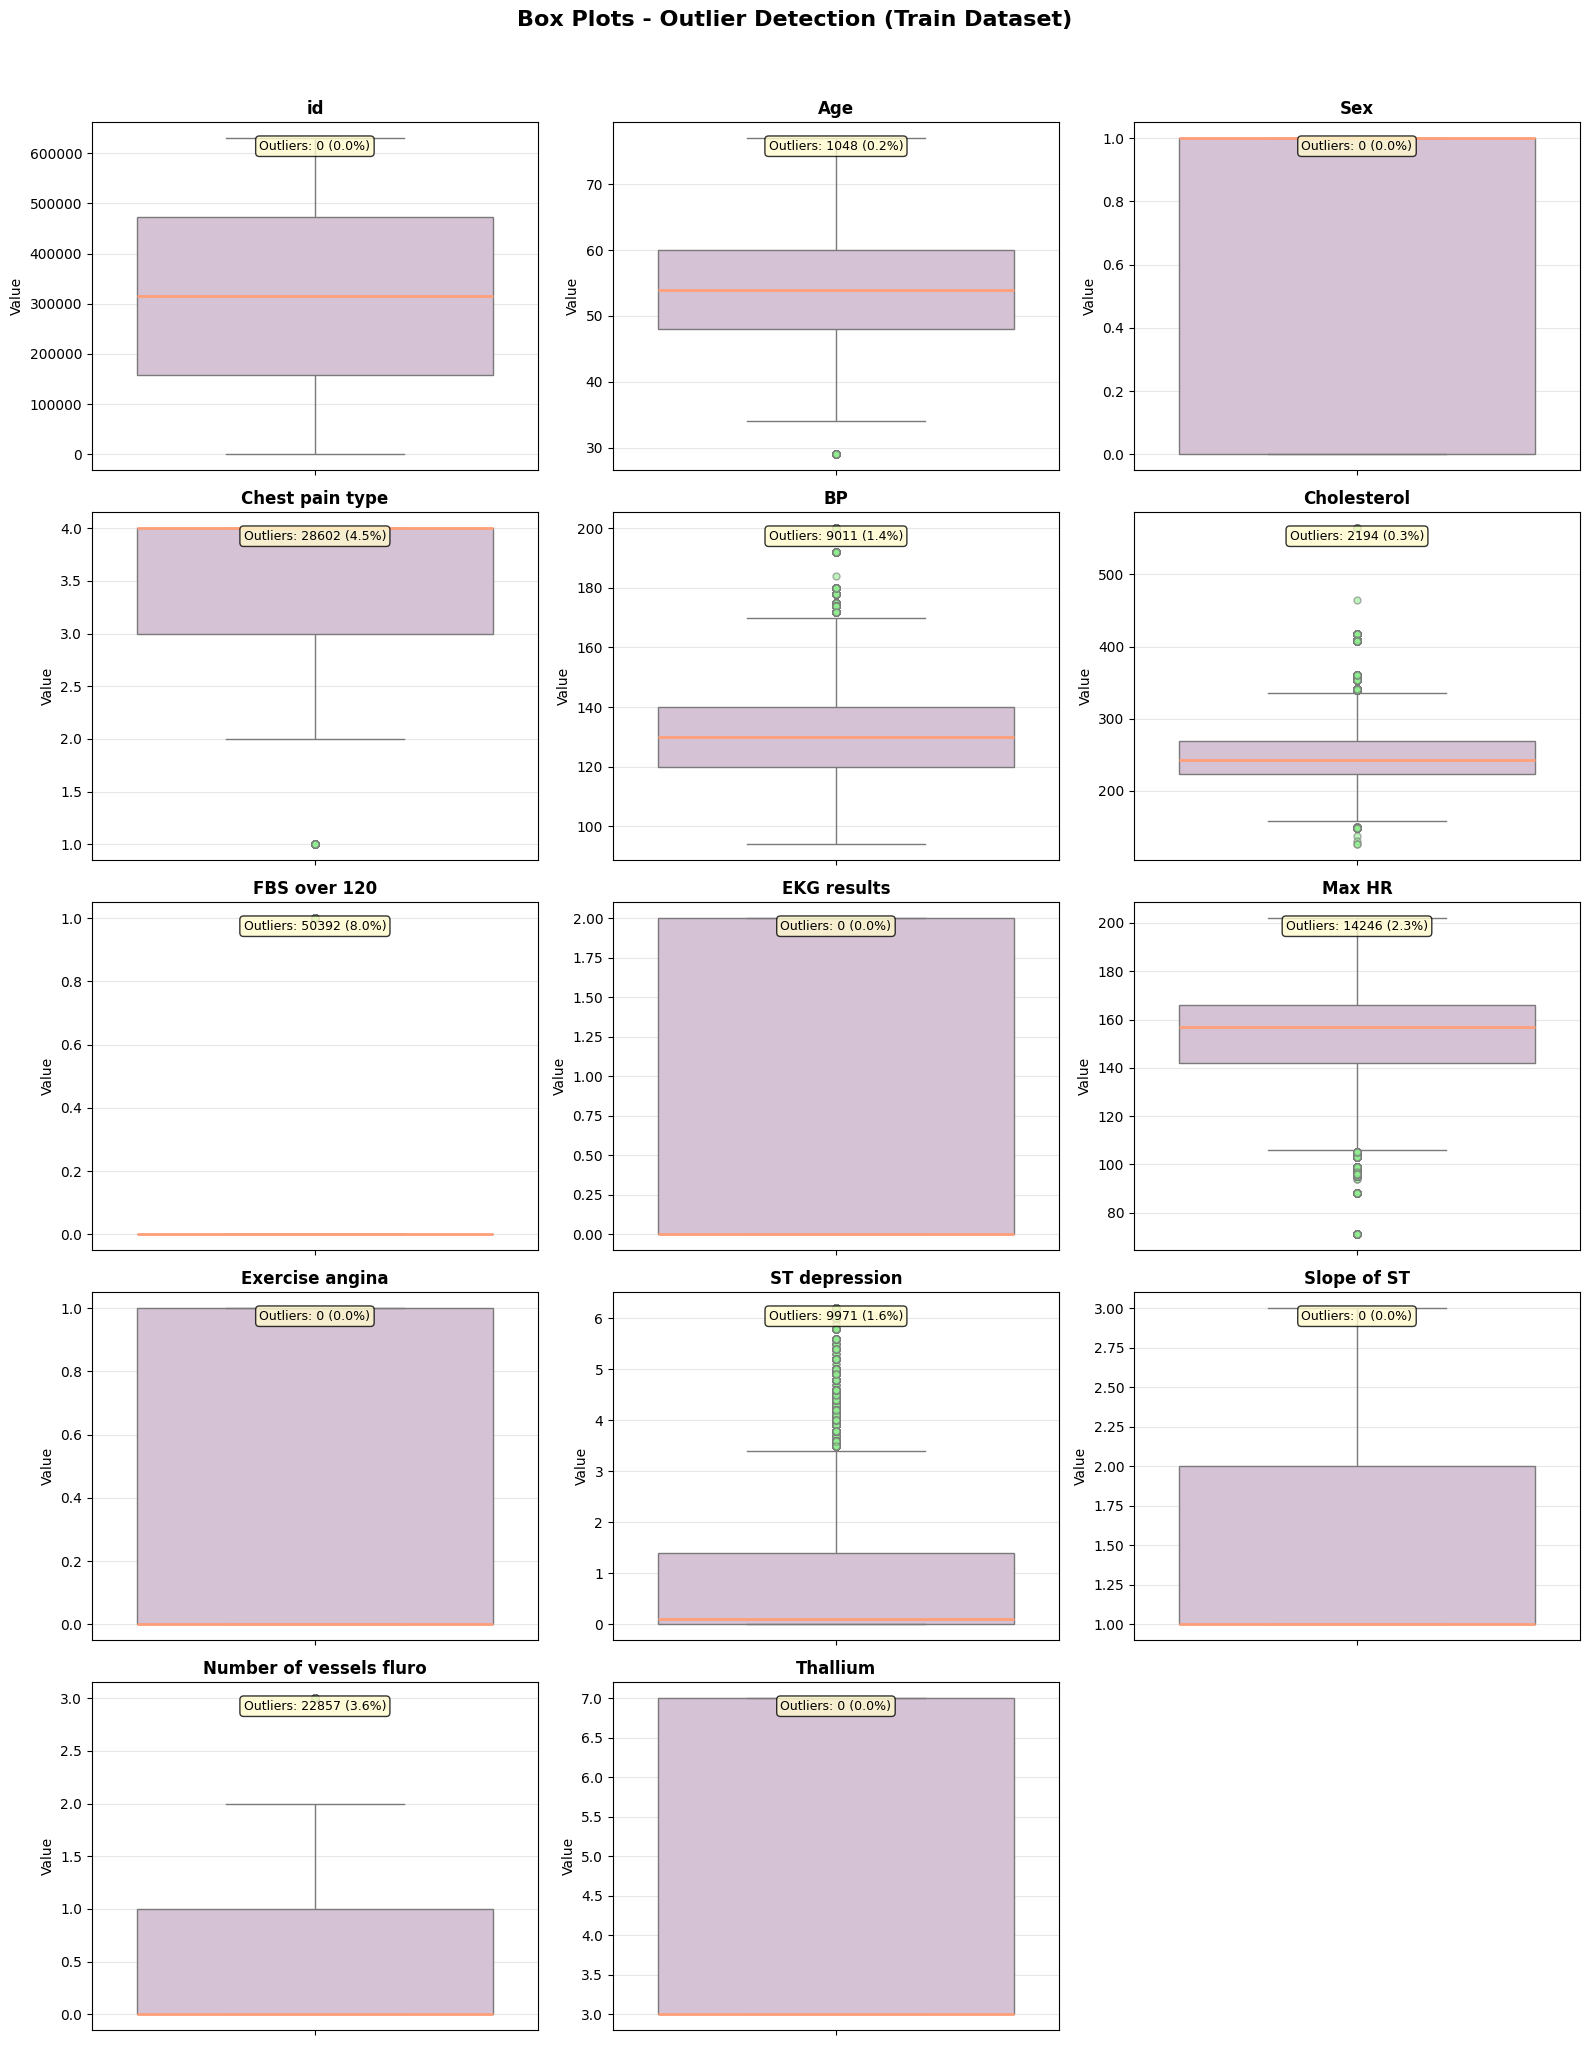

In [24]:
COLORS = {
    'primary': '#D8BFD8',      
    'secondary': '#FFA07A',    
    'accent': '#90EE90',       
    'light': '#FFFACD'         
}

n_cols = 3
n_rows = (len(NUMS) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4 * n_rows))
axes = axes.flatten()

# ---------------- Plot Each Feature ----------------
for i, col in enumerate(NUMS):
    # Use Seaborn boxplot for modern styling
    sns.boxplot(
        y=train_df[col], 
        ax=axes[i], 
        color=COLORS['primary'], 
        medianprops=dict(color=COLORS['secondary'], linewidth=2),
        flierprops=dict(marker='o', markerfacecolor=COLORS['accent'], alpha=0.6, markersize=5)
    )
    
    axes[i].set_title(f'{col}', fontsize=12, fontweight='bold')
    axes[i].set_ylabel('Value', fontsize=10)
    axes[i].grid(axis='y', alpha=0.3)

    # Outlier calculation
    q1 = train_df[col].quantile(0.25)
    q3 = train_df[col].quantile(0.75)
    iqr = q3 - q1
    outliers = ((train_df[col] < (q1 - 1.5 * iqr)) | (train_df[col] > (q3 + 1.5 * iqr))).sum()
    outlier_pct = outliers / len(train_df) * 100

    # Annotation
    axes[i].text(
        0.5, 0.95, f'Outliers: {outliers} ({outlier_pct:.1f}%)', 
        transform=axes[i].transAxes, ha='center', va='top',
        bbox=dict(boxstyle='round,pad=0.3', facecolor=COLORS['light'], alpha=0.8), fontsize=9
    )

# Turn off empty axes
for i in range(len(NUMS), len(axes)):
    axes[i].axis('off')

plt.suptitle('Box Plots - Outlier Detection (Train Dataset)', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


## Skewness & Kurtosis – Enhanced Visualization

SKEWNESS AND KURTOSIS ANALYSIS


,Feature,Skewness,Kurtosis,Mean,Std,Skew_Type
6,FBS over 120,3.096606,7.588996,0.079987,0.271274,Highly Right
12,Number of vessels fluro,1.736669,2.096608,0.451040,0.798549,Highly Right
10,ST depression,1.328429,1.374855,0.716028,0.948472,Highly Right
3,Chest pain type,-1.085939,0.368411,3.312752,0.851615,Highly Left
9,Exercise angina,1.014983,-0.969812,0.273725,0.445870,Highly Right
2,Sex,-0.951123,-1.095368,0.714735,0.451541,Left
8,Max HR,-0.754556,0.203852,152.816763,19.112927,Left
11,Slope of ST,0.630518,-0.736092,1.455871,0.545192,Right
4,BP,0.629283,0.933183,130.497433,14.975802,Right
13,Thallium,0.381173,-1.844162,4.618873,1.950007,Symmetric


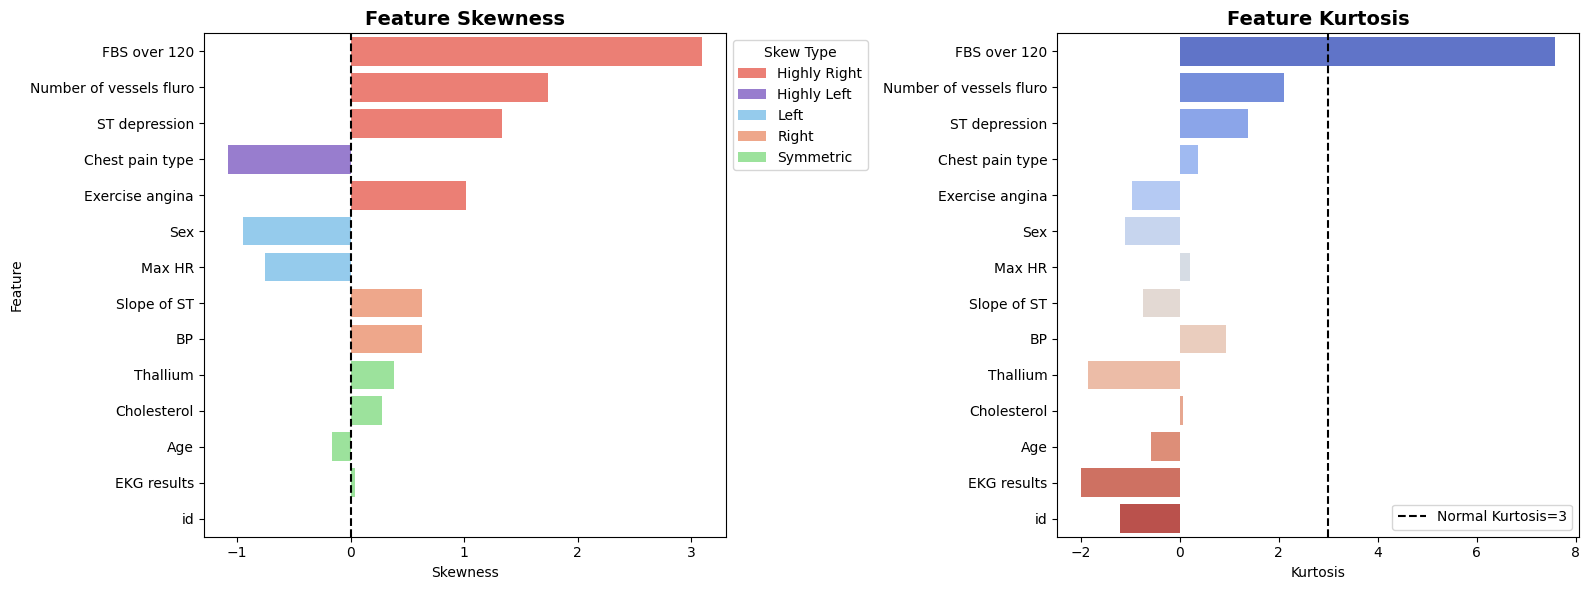


Interpretation:
  • Skewness > 1 or < -1: Highly skewed (consider log or sqrt transform)
  • Skewness between -0.5 and 0.5: Approximately symmetric
  • Kurtosis > 3: Heavy tails (more outliers)
  • Kurtosis < 3: Light tails (fewer outliers)


In [25]:
skew_kurt_df = pd.DataFrame({
    'Feature': NUMS,
    'Skewness': [train_df[col].skew() for col in NUMS],
    'Kurtosis': [train_df[col].kurtosis() for col in NUMS],
    'Mean': [train_df[col].mean() for col in NUMS],
    'Std': [train_df[col].std() for col in NUMS]
})

# ---------------- Skew Type ----------------
def skew_type(x):
    if x > 1: return 'Highly Right'
    elif x > 0.5: return 'Right'
    elif x >= -0.5: return 'Symmetric'
    elif x >= -1: return 'Left'
    else: return 'Highly Left'

skew_kurt_df['Skew_Type'] = skew_kurt_df['Skewness'].apply(skew_type)
skew_kurt_df = skew_kurt_df.sort_values('Skewness', key=abs, ascending=False)

# ---------------- Display Table ----------------
colors_map = {
    'Highly Right': '#FF6F61',  # soft red
    'Right': '#FFA07A',         # light salmon
    'Symmetric': '#90EE90',     # light green
    'Left': '#87CEFA',          # light blue
    'Highly Left': '#9370DB'    # light purple
}

styled_table = skew_kurt_df.style \
    .background_gradient(subset=['Skewness', 'Kurtosis'], cmap='coolwarm') \
    .applymap(lambda x: 'background-color: ' + colors_map[x] if x in colors_map else '', subset=['Skew_Type'])

print("="*80)
print("SKEWNESS AND KURTOSIS ANALYSIS")
print("="*80)
display(styled_table)

# ---------------- Horizontal Bar Plot ----------------
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Skewness bar
sns.barplot(
    y='Feature', x='Skewness', data=skew_kurt_df, 
    hue='Skew_Type', dodge=False, palette=colors_map, ax=axes[0]
)
axes[0].axvline(0, color='black', linestyle='--')
axes[0].set_title('Feature Skewness', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Skewness')
axes[0].set_ylabel('Feature')
axes[0].legend(title='Skew Type', bbox_to_anchor=(1,1))

# Kurtosis bar
sns.barplot(
    y='Feature', x='Kurtosis', data=skew_kurt_df, 
    palette='coolwarm', ax=axes[1]
)
axes[1].axvline(3, color='black', linestyle='--', label='Normal Kurtosis=3')
axes[1].set_title('Feature Kurtosis', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Kurtosis')
axes[1].set_ylabel('')
axes[1].legend()

plt.tight_layout()
plt.show()

# ---------------- Interpretation ----------------
print("\nInterpretation:")
print("  • Skewness > 1 or < -1: Highly skewed (consider log or sqrt transform)")
print("  • Skewness between -0.5 and 0.5: Approximately symmetric")
print("  • Kurtosis > 3: Heavy tails (more outliers)")
print("  • Kurtosis < 3: Light tails (fewer outliers)")

## ✅ Enhanced Categorical Feature Distribution

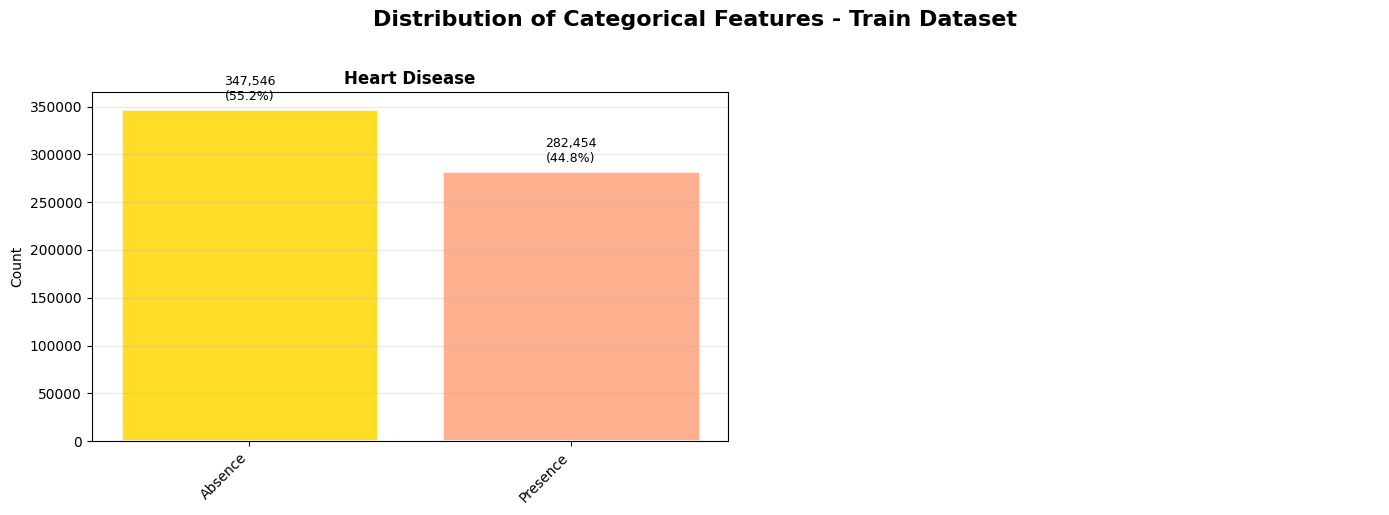

In [26]:
# Check if categorical features exist
if len(CATS) > 0:
    n_cols = 2
    n_rows = (len(CATS) + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 5 * n_rows))
    axes = axes.flatten()

    # Light & vibrant colors
    COLORS_CAT = ['#FFD700', '#FFA07A', '#90EE90', '#D8BFD8', '#87CEFA', '#FFB6C1']

    for i, col in enumerate(CATS):
        cat_counts = train_df[col].value_counts().sort_index()

        # Bar chart with light colors
        axes[i].bar(
            range(len(cat_counts)), cat_counts.values, 
            color=[COLORS_CAT[j % len(COLORS_CAT)] for j in range(len(cat_counts))],
            alpha=0.85, edgecolor='white', linewidth=2
        )

        axes[i].set_xticks(range(len(cat_counts)))
        axes[i].set_xticklabels(cat_counts.index, rotation=45, ha='right', fontsize=10)
        axes[i].set_title(f'{col}', fontsize=12, fontweight='bold')
        axes[i].set_ylabel('Count', fontsize=10)
        axes[i].grid(axis='y', alpha=0.3)

        # Annotate counts & percentages
        for j, (label, count) in enumerate(cat_counts.items()):
            pct = count / len(train_df) * 100
            axes[i].text(
                j, count + len(train_df)*0.01,
                f'{count:,}\n({pct:.1f}%)',
                ha='center', va='bottom', fontsize=9
            )

    # Turn off empty axes
    for i in range(len(CATS), len(axes)):
        axes[i].axis('off')

    plt.suptitle('Distribution of Categorical Features - Train Dataset', fontsize=16, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()
else:
    print("No categorical features found.")

## Bivariate Analysis - Features vs Target

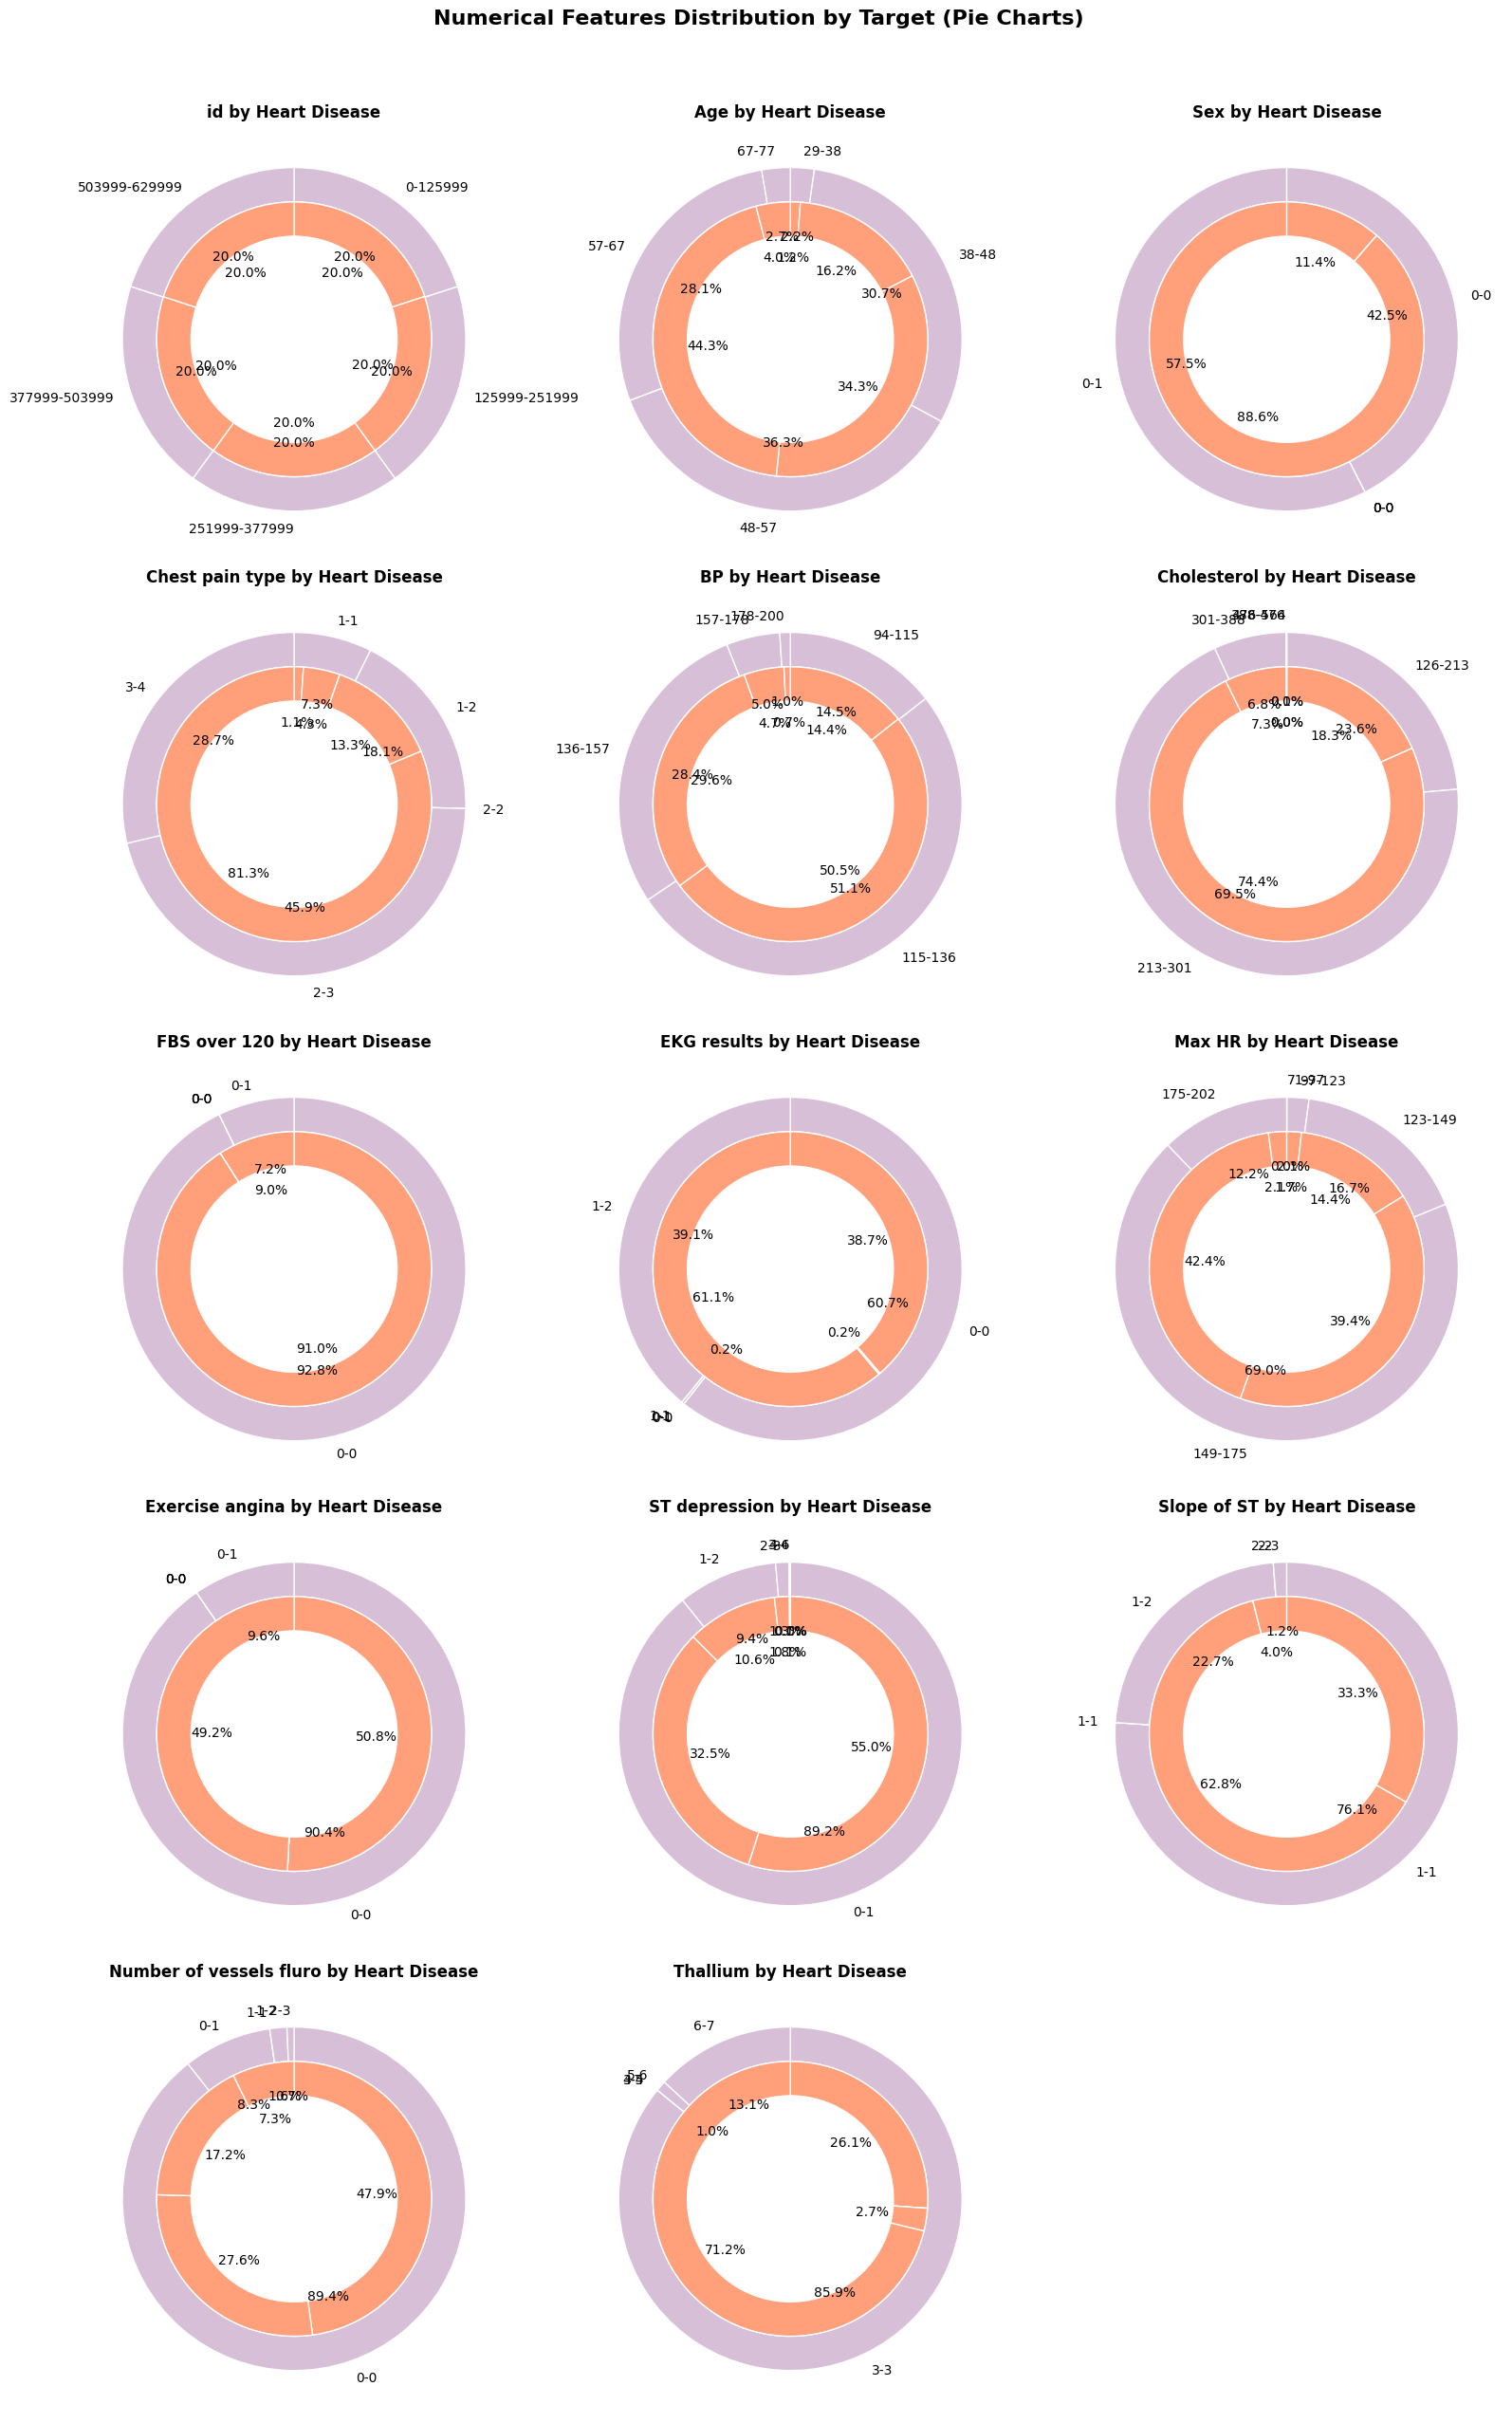

In [27]:
COLORS_TARGET = ['#D8BFD8', '#FFA07A']  # light purple & light red

n_cols = 3
n_rows = (len(NUMS) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(NUMS):
    ax = axes[i]
    bins = np.histogram_bin_edges(train_df[col], bins=5)  # 5 bins for pie
    bin_labels = [f'{int(bins[j])}-{int(bins[j+1])}' for j in range(len(bins)-1)]

    # Count per bin per target
    counts_per_bin = []
    for target_val in sorted(train_df[TARGET].unique()):
        counts, _ = np.histogram(train_df[train_df[TARGET] == target_val][col], bins=bins)
        counts_per_bin.append(counts)

    # Pie for each target stacked
    bottom_counts = np.zeros(len(bins)-1)
    for target_idx, target_val in enumerate(sorted(train_df[TARGET].unique())):
        ax.pie(
            counts_per_bin[target_idx], 
            labels=bin_labels if target_idx == 0 else None,  # show labels only once
            startangle=90,
            counterclock=False,
            radius=1 - 0.2*target_idx,  # stack smaller radius for second target
            colors=[COLORS_TARGET[target_idx]]*len(bin_labels),
            autopct=lambda pct: f'{pct:.1f}%' if pct > 0 else '',
            wedgeprops=dict(width=0.2, edgecolor='white')
        )

    ax.set_title(f'{col} by {TARGET}', fontsize=12, fontweight='bold')


for i in range(len(NUMS), len(axes)):
    axes[i].axis('off')

plt.suptitle('Numerical Features Distribution by Target (Pie Charts)', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

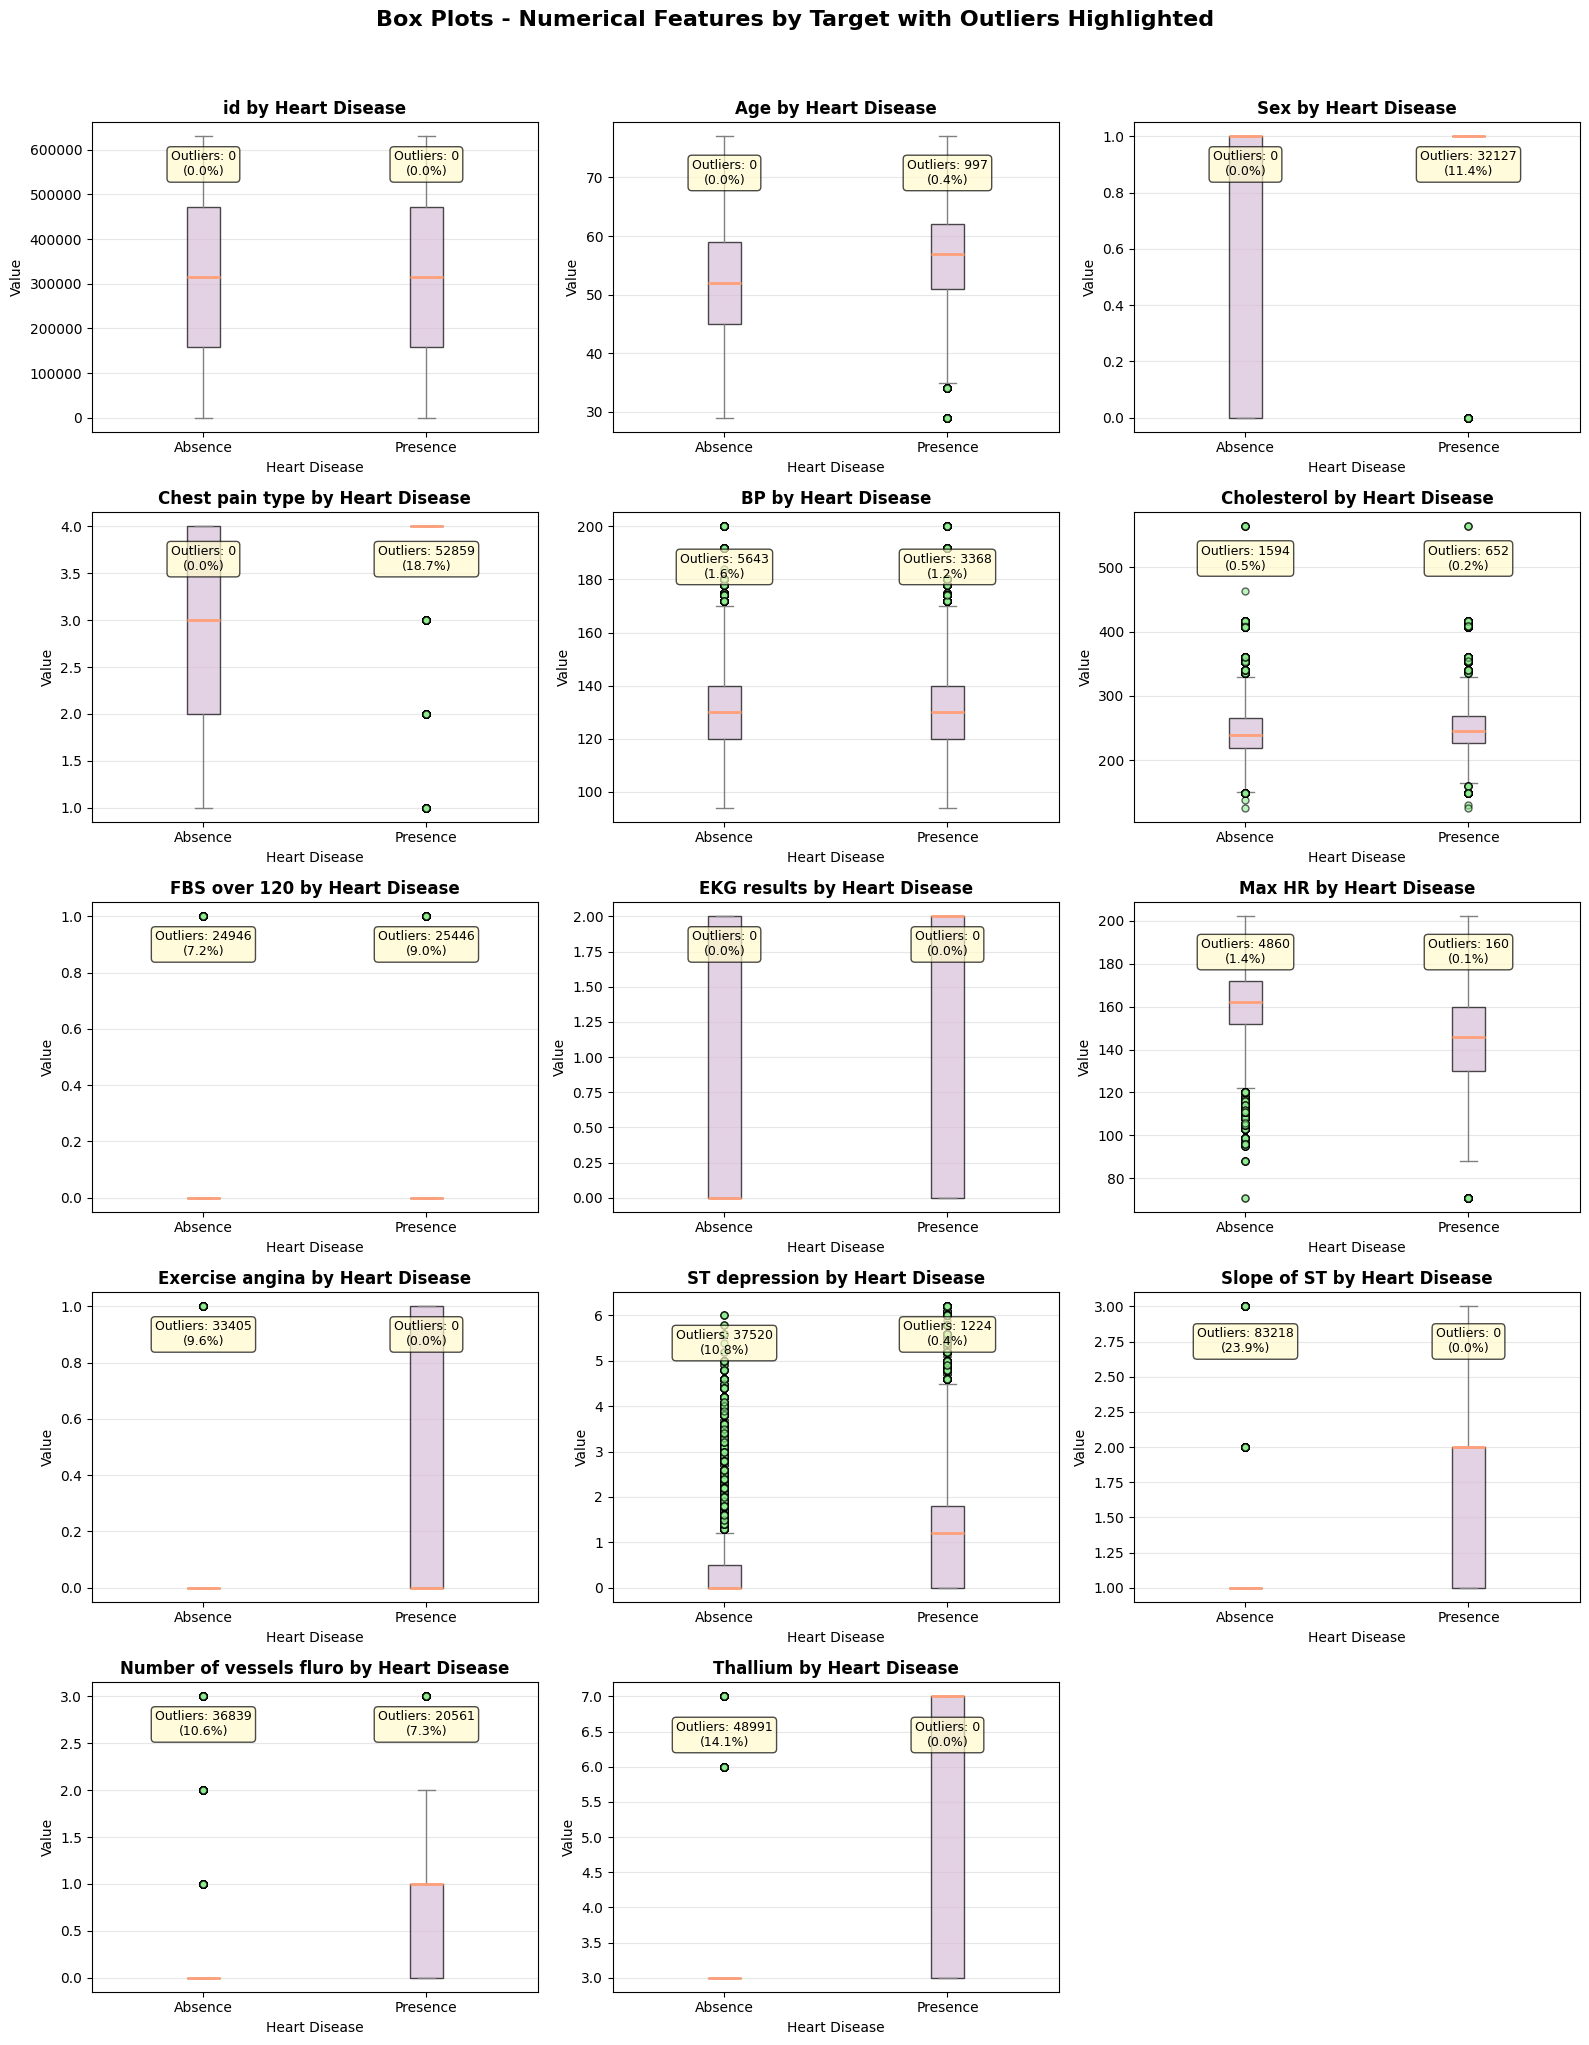

In [28]:
COLORS = {
    'primary': '#D8BFD8',    # light purple for boxes
    'secondary': '#FFA07A',  # light red for median
    'accent': '#90EE90',     # light green for outliers
    'light': '#FFFACD'       # light yellow for annotation background
}

n_cols = 3
n_rows = (len(NUMS) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(NUMS):
    data_by_target = [train_df[train_df[TARGET] == val][col] for val in sorted(train_df[TARGET].unique())]
    labels = [str(val) for val in sorted(train_df[TARGET].unique())]
    
    # Boxplot with colored boxes
    bp = axes[i].boxplot(
        data_by_target,
        labels=labels,
        patch_artist=True,
        boxprops=dict(facecolor=COLORS['primary'], alpha=0.7),
        medianprops=dict(color=COLORS['secondary'], linewidth=2),
        whiskerprops=dict(color='grey'),
        capprops=dict(color='grey'),
        flierprops=dict(marker='o', markerfacecolor=COLORS['accent'], markersize=5, alpha=0.6)
    )
    
    # Calculate and annotate outliers
    for j, data in enumerate(data_by_target):
        q1 = np.percentile(data, 25)
        q3 = np.percentile(data, 75)
        iqr = q3 - q1
        outliers = ((data < (q1 - 1.5 * iqr)) | (data > (q3 + 1.5 * iqr))).sum()
        outlier_pct = outliers / len(data) * 100
        
        axes[i].text(
            j + 1, max(data)*0.95,
            f'Outliers: {outliers}\n({outlier_pct:.1f}%)',
            ha='center', va='top',
            fontsize=9,
            bbox=dict(boxstyle='round,pad=0.3', facecolor=COLORS['light'], alpha=0.7)
        )
    
    axes[i].set_title(f'{col} by {TARGET}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(TARGET, fontsize=10)
    axes[i].set_ylabel('Value', fontsize=10)
    axes[i].grid(axis='y', alpha=0.3)

# Turn off unused axes
for i in range(len(NUMS), len(axes)):
    axes[i].axis('off')

plt.suptitle('Box Plots - Numerical Features by Target with Outliers Highlighted', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

#### Color-coding effect strength (strong, moderate, weak) for quick insight.

Adding horizontal bar charts showing -log10(p-value) — makes significance very visual.

Highlight significant vs non-significant features clearly.

Keep the Mann-Whitney U test info at the top for context.

STATISTICAL SIGNIFICANCE TESTS (Numerical Features vs Target)

Using Mann-Whitney U Test (non-parametric)
H0: The distributions are the same
H1: The distributions are different
Significance Level: α = 0.05



,Feature,Test_Statistic,P_Value,Significant,Effect
1,Age,36747944418.500000,0.000000,Yes,Strong
2,Sex,33821991183.000000,0.000000,Yes,Strong
3,Chest pain type,22747841890.500000,0.000000,Yes,Strong
5,Cholesterol,43889513411.000000,0.000000,Yes,Strong
7,EKG results,38268651767.000000,0.000000,Yes,Strong
10,ST depression,26143741179.500000,0.000000,Yes,Strong
9,Exercise angina,29638821411.000000,0.000000,Yes,Strong
8,Max HR,74204284951.500000,0.000000,Yes,Strong
12,Number of vessels fluro,27992132670.500000,0.000000,Yes,Strong
13,Thallium,19556787450.000000,0.000000,Yes,Strong



Significant Features (p < 0.05): 12/14


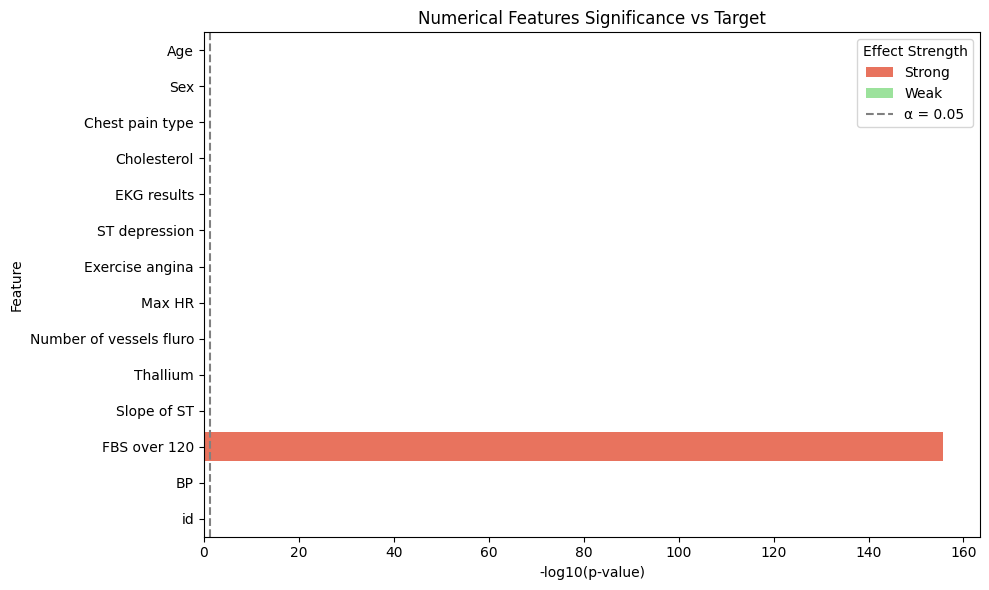

In [29]:
print("="*80)
print("STATISTICAL SIGNIFICANCE TESTS (Numerical Features vs Target)")
print("="*80)
print("\nUsing Mann-Whitney U Test (non-parametric)")
print("H0: The distributions are the same")
print("H1: The distributions are different")
print(f"Significance Level: α = 0.05\n")

# ---------------- Test ----------------
significance_results = []

for col in NUMS:
    groups = [train_df[train_df[TARGET] == val][col].values for val in sorted(train_df[TARGET].unique())]
    
    if len(groups) == 2:
        stat, p_value = stats.mannwhitneyu(groups[0], groups[1], alternative='two-sided')
        
        significance_results.append({
            'Feature': col,
            'Test_Statistic': stat,
            'P_Value': p_value,
            'Significant': 'Yes' if p_value < 0.05 else 'No',
            'Effect': 'Strong' if p_value < 0.01 else ('Moderate' if p_value < 0.05 else 'Weak')
        })

sig_df = pd.DataFrame(significance_results).sort_values('P_Value')

# ---------------- Display Table ----------------
effect_colors = {'Strong': '#FF6347', 'Moderate': '#FFD700', 'Weak': '#90EE90'}
styled_table = sig_df.style.background_gradient(subset=['P_Value'], cmap='RdYlGn_r') \
                           .applymap(lambda x: f'background-color: {effect_colors[x]}' if x in effect_colors else '', subset=['Effect'])

display(styled_table)

print(f"\nSignificant Features (p < 0.05): {sig_df[sig_df['Significant'] == 'Yes'].shape[0]}/{len(NUMS)}")

# ---------------- Horizontal Bar Chart ----------------
plt.figure(figsize=(10,6))
sns.barplot(
    x=-np.log10(sig_df['P_Value']), 
    y=sig_df['Feature'], 
    hue=sig_df['Effect'],
    dodge=False, palette=effect_colors
)
plt.axvline(-np.log10(0.05), color='grey', linestyle='--', label='α = 0.05')
plt.xlabel('-log10(p-value)')
plt.ylabel('Feature')
plt.title('Numerical Features Significance vs Target')
plt.legend(title='Effect Strength')
plt.tight_layout()
plt.show()

## Categorical Features vs Target (if any)

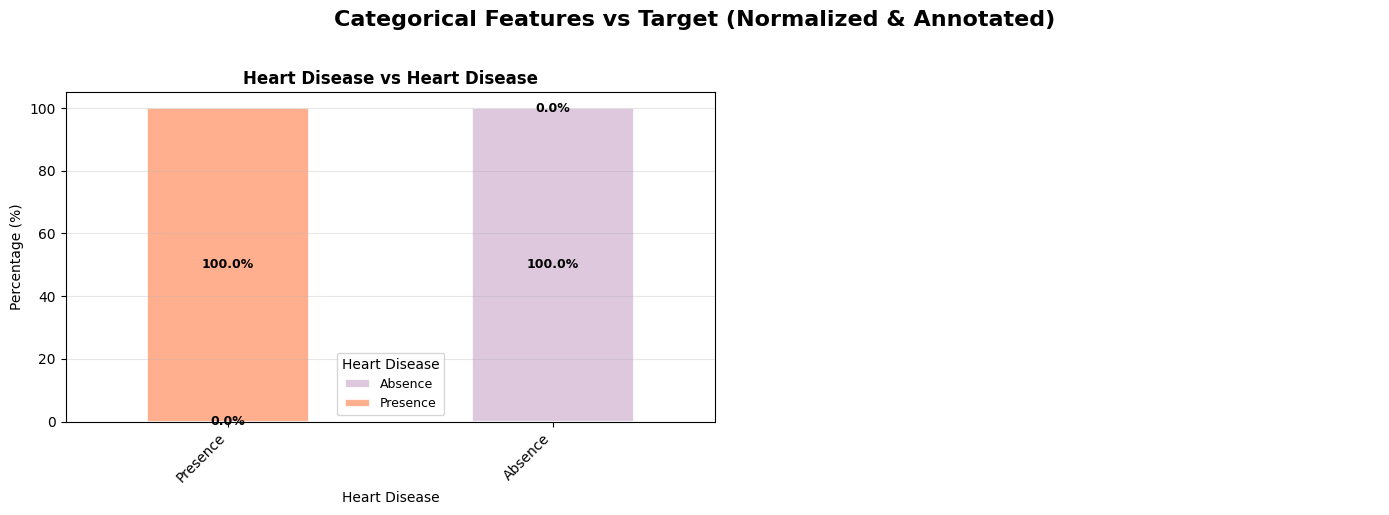


CHI-SQUARE TESTS (Categorical Features vs Target)
H0: Features are independent
H1: Features are dependent



,Feature,Chi2_Statistic,P_Value,DOF,Significant
0,Heart Disease,629995.956845,0.000000,1,Yes


In [30]:
from scipy.stats import chi2_contingency

if len(CATS) > 0:
    n_cols = 2
    n_rows = (len(CATS) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 5 * n_rows))
    axes = axes.flatten()
    
    for i, col in enumerate(CATS):
        # Crosstab and normalize by row
        ct = pd.crosstab(train_df[col], train_df[TARGET], normalize='index') * 100
        ct = ct.sort_values(by=ct.columns[1], ascending=False)  # sort by target=1 proportion
        
        # Stacked bar chart
        ct.plot(kind='bar', stacked=True, ax=axes[i], 
                color=['#D8BFD8', '#FFA07A'], alpha=0.85, edgecolor='white', linewidth=1.5)
        
        axes[i].set_title(f'{col} vs {TARGET}', fontsize=12, fontweight='bold')
        axes[i].set_xlabel(col, fontsize=10)
        axes[i].set_ylabel('Percentage (%)', fontsize=10)
        axes[i].legend(title=TARGET, fontsize=9)
        axes[i].grid(axis='y', alpha=0.3)
        axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
        
        # Annotate percentages
        for idx, row_val in enumerate(ct.index):
            bottom = 0
            for j, target_val in enumerate(ct.columns):
                val = ct.loc[row_val, target_val]
                axes[i].text(idx, bottom + val/2, f'{val:.1f}%', ha='center', va='center', fontsize=9, fontweight='bold')
                bottom += val
    
    for i in range(len(CATS), len(axes)):
        axes[i].axis('off')
    
    plt.suptitle('Categorical Features vs Target (Normalized & Annotated)', fontsize=16, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()
    
    # ---------------- Chi-Square Tests ----------------
    print("\n" + "="*80)
    print("CHI-SQUARE TESTS (Categorical Features vs Target)")
    print("="*80)
    print("H0: Features are independent")
    print("H1: Features are dependent\n")
    
    chi_results = []
    
    for col in CATS:
        ct = pd.crosstab(train_df[col], train_df[TARGET])
        chi2, p_value, dof, expected = chi2_contingency(ct)
        
        chi_results.append({
            'Feature': col,
            'Chi2_Statistic': chi2,
            'P_Value': p_value,
            'DOF': dof,
            'Significant': 'Yes' if p_value < 0.05 else 'No'
        })
    
    chi_df = pd.DataFrame(chi_results).sort_values('P_Value')
    
    # Color-code significance
    chi_colors = {'Yes':'#FFA07A', 'No':'#D8BFD8'}
    display(
        chi_df.style.applymap(lambda x: f'background-color: {chi_colors[x]}' if x in chi_colors else '', subset=['Significant'])
              .background_gradient(subset=['P_Value'], cmap='RdYlGn_r')
    )
else:
    print("No categorical features to analyze.")


## Multivariate Analysis¶

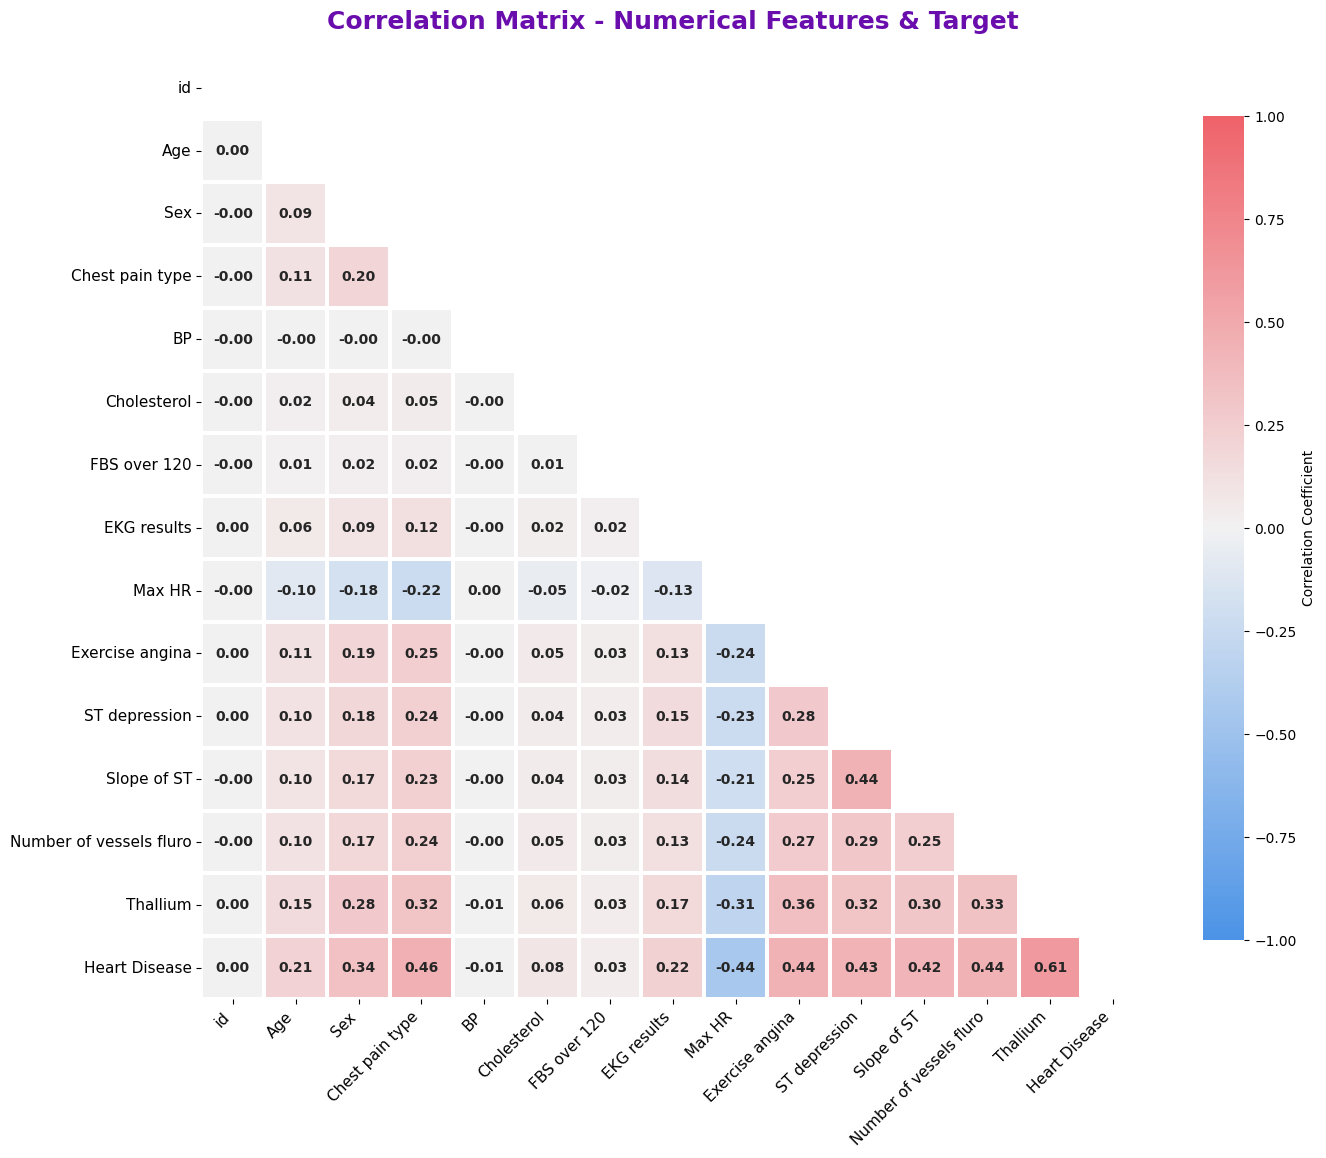

HIGH CORRELATIONS (|r| > 0.7)
✓ No high correlations found (|r| > 0.7)


In [31]:
corr_data = train_df[NUMS + [TARGET]].copy()

# Convert target to numeric if categorical
if corr_data[TARGET].dtype == 'object':
    target_mapping = {val: idx for idx, val in enumerate(sorted(corr_data[TARGET].unique()))}
    corr_data[TARGET] = corr_data[TARGET].map(target_mapping)

corr_matrix = corr_data.corr()

# ---------------- Mask upper triangle ----------------
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# ---------------- Plot ----------------
plt.figure(figsize=(14, 12))

# Custom colormap
cmap = sns.diverging_palette(250, 10, n=200, s=80, l=60, as_cmap=True)  # purple → yellow → red

sns.heatmap(
    corr_matrix, mask=mask, annot=True, fmt='.2f', cmap=cmap, vmin=-1, vmax=1, center=0,
    square=True, linewidths=1.5, cbar_kws={"shrink": 0.8, "label": "Correlation Coefficient"},
    annot_kws={"fontsize":10, "weight":"bold"}
)

plt.title('Correlation Matrix - Numerical Features & Target', fontsize=18, fontweight='bold', pad=20, color='#6A0DAD')  # purple title
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()

# ---------------- High correlations ----------------
print("="*80)
print("HIGH CORRELATIONS (|r| > 0.7)")
print("="*80)

high_corr = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.7:
            high_corr.append({
                'Feature_1': corr_matrix.columns[i],
                'Feature_2': corr_matrix.columns[j],
                'Correlation': corr_matrix.iloc[i, j]
            })

if high_corr:
    high_corr_df = pd.DataFrame(high_corr).sort_values('Correlation', key=abs, ascending=False)
    display(high_corr_df.style.background_gradient(subset=['Correlation'], cmap='PuRd'))
    print("\n⚠ High multicollinearity detected. Consider feature selection or regularization.")
else:
    print("✓ No high correlations found (|r| > 0.7)")

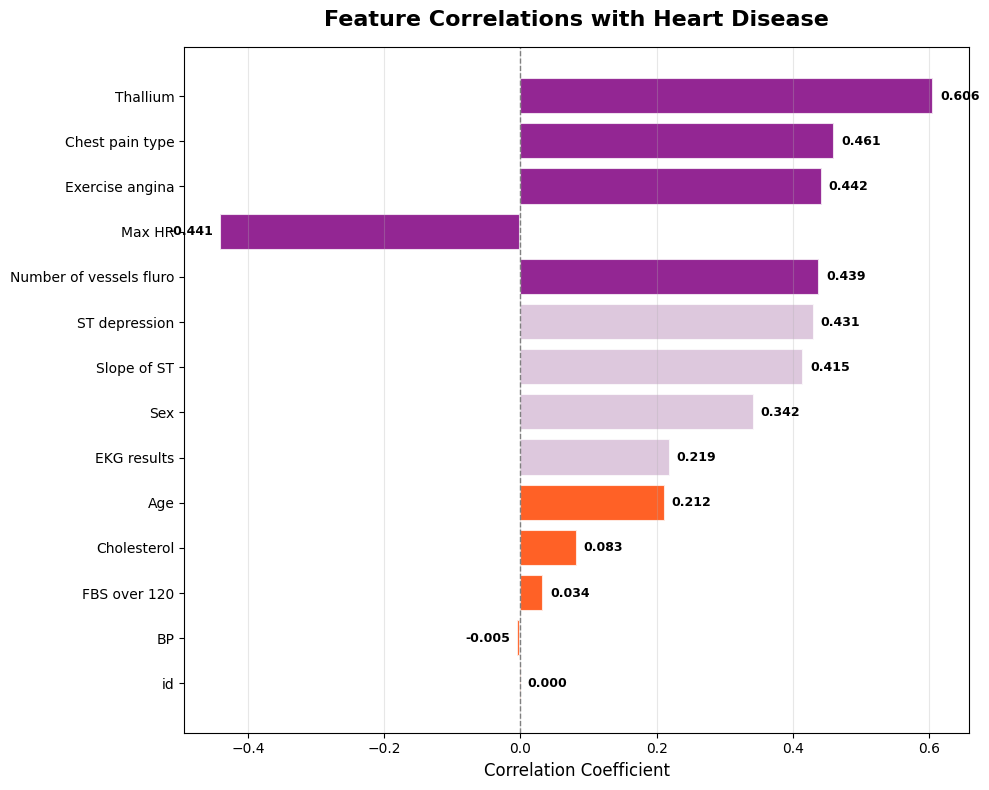

TOP 5 POSITIVELY CORRELATED FEATURES WITH Heart Disease
Thallium                   0.605776
Chest pain type            0.460684
Exercise angina            0.441864
Max HR                    -0.440985
Number of vessels fluro    0.438604
Name: Heart Disease, dtype: float64

TOP 5 NEGATIVELY CORRELATED FEATURES WITH Heart Disease
id              0.000209
BP             -0.005181
FBS over 120    0.033570
Cholesterol     0.082753
Age             0.212091
Name: Heart Disease, dtype: float64


In [32]:
target_corr = corr_matrix[TARGET].drop(TARGET).sort_values(key=abs, ascending=True)  # ascending for horizontal bars

fig, ax = plt.subplots(figsize=(10, 8))

# Colors: light purple for positive, light red for negative
colors = [('#D8BFD8' if val > 0 else '#FFA07A') for val in target_corr.values]

# Highlight top 5 positive and negative
top_pos_idx = target_corr.tail(5).index
top_neg_idx = target_corr.head(5).index
highlight_colors = []
for feat in target_corr.index:
    if feat in top_pos_idx:
        highlight_colors.append('#800080')  # dark purple
    elif feat in top_neg_idx:
        highlight_colors.append('#FF4500')  # dark red
    else:
        highlight_colors.append(colors[target_corr.index.get_loc(feat)])

# Horizontal bar plot
bars = ax.barh(range(len(target_corr)), target_corr.values, color=highlight_colors, alpha=0.85, edgecolor='white', linewidth=1.5)

# Y-axis labels
ax.set_yticks(range(len(target_corr)))
ax.set_yticklabels(target_corr.index, fontsize=10)
ax.set_xlabel('Correlation Coefficient', fontsize=12)
ax.set_title(f'Feature Correlations with {TARGET}', fontsize=16, fontweight='bold', pad=15)

# Reference line at 0
ax.axvline(0, color='grey', linewidth=1, linestyle='--')
ax.grid(axis='x', alpha=0.3)

# Annotate correlation values
for i, val in enumerate(target_corr.values):
    ax.text(val + (0.01 if val > 0 else -0.01), i, f'{val:.3f}', va='center', 
            ha='left' if val > 0 else 'right', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

# ---------------- Top correlated features ----------------
print("="*80)
print(f"TOP 5 POSITIVELY CORRELATED FEATURES WITH {TARGET}")
print("="*80)
print(target_corr.tail(5)[::-1])  # reverse to show highest first

print("\n" + "="*80)
print(f"TOP 5 NEGATIVELY CORRELATED FEATURES WITH {TARGET}")
print("="*80)
print(target_corr.head(5))

#### Distribution Comparison - Train vs Test vs Original

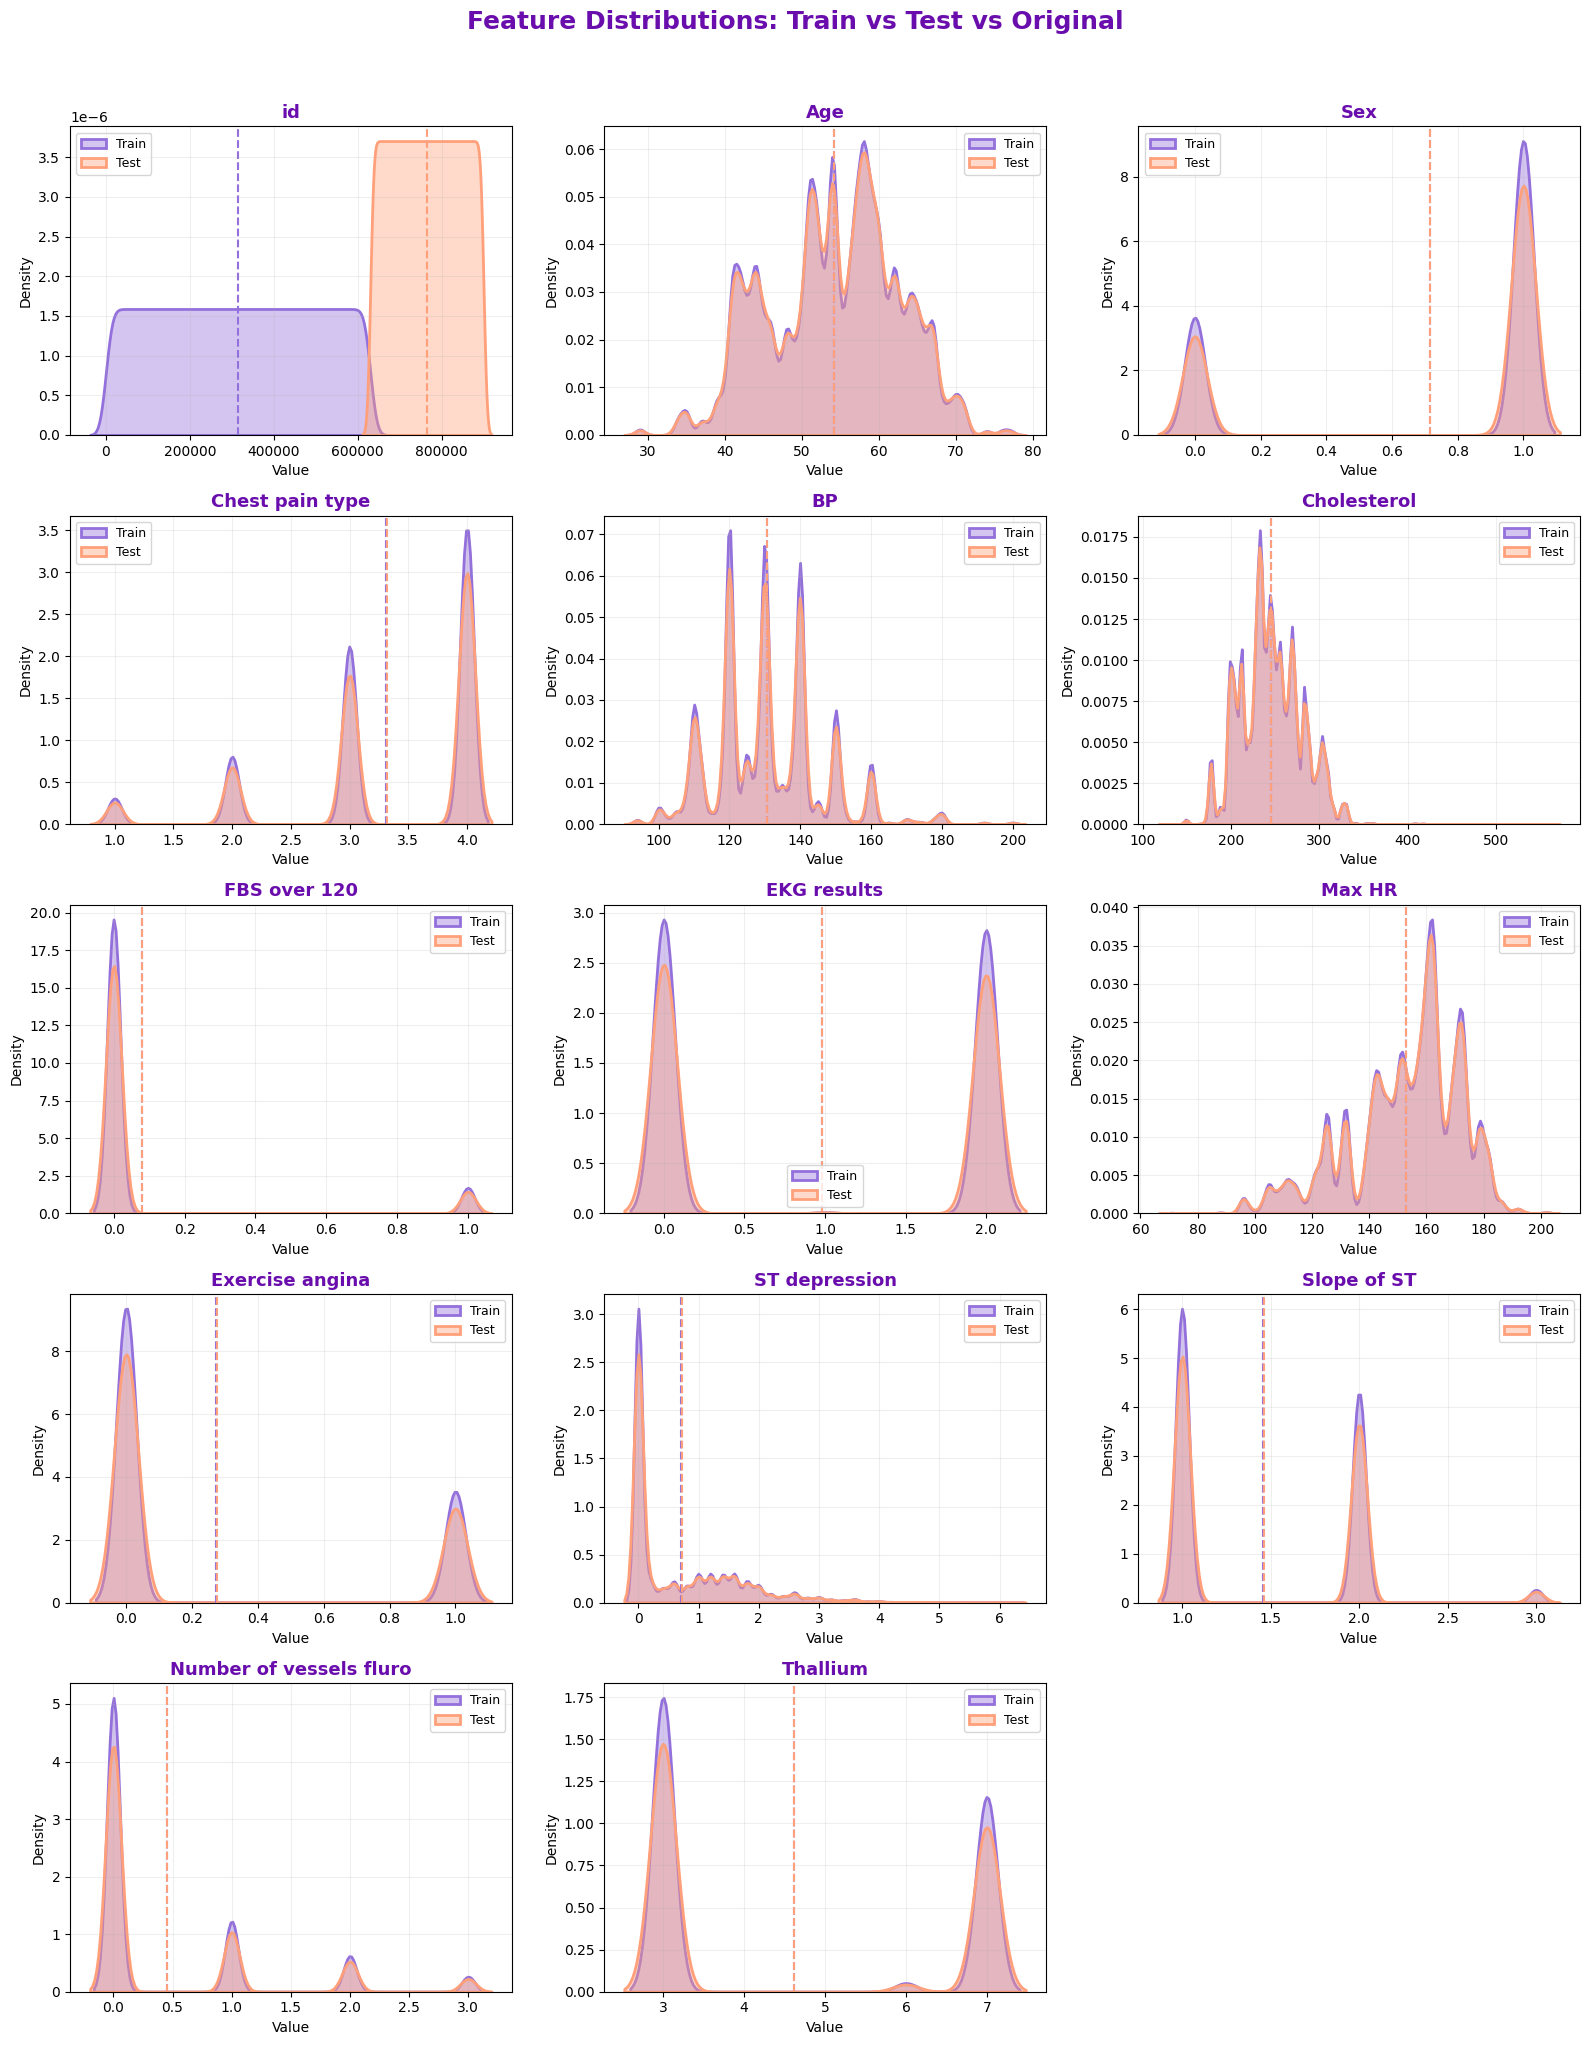

In [33]:
df_combined = pd.DataFrame()

for col in NUMS:
    for source_name, df in zip(['Train','Test','Original'], [train_df, test_df, original] if 'original' in globals() else [train_df, test_df]):
        if col in df.columns:
            temp = df[col].copy()
            temp.name = 'value'
            temp_df = temp.to_frame()
            temp_df['source'] = source_name
            temp_df['feature'] = col
            df_combined = pd.concat([df_combined, temp_df], ignore_index=True)

# ---------------- Plot distributions ----------------
n_cols = 3
n_rows = (len(NUMS) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4 * n_rows))
axes = axes.flatten()

# Color palette
palette = {'Train':'#9370DB', 'Test':'#FFA07A', 'Original':'#FFD700'}  # Light Purple, Light Red, Light Yellow

for i, col in enumerate(NUMS):
    data_subset = df_combined[df_combined['feature'] == col]
    
    for source in ['Train', 'Test', 'Original']:
        source_data = data_subset[data_subset['source'] == source]['value']
        if len(source_data) > 0:
            sns.kdeplot(
                source_data, ax=axes[i], label=source, 
                color=palette[source], fill=True, alpha=0.4, linewidth=2
            )
            # Add vertical line for mean
            axes[i].axvline(source_data.mean(), color=palette[source], linestyle='--', linewidth=1.5)

    axes[i].set_title(f'{col}', fontsize=13, fontweight='bold', color='#6A0DAD')
    axes[i].set_xlabel('Value', fontsize=10)
    axes[i].set_ylabel('Density', fontsize=10)
    axes[i].legend(fontsize=9)
    axes[i].grid(alpha=0.2)

for i in range(len(NUMS), len(axes)):
    axes[i].axis('off')

plt.suptitle('Feature Distributions: Train vs Test vs Original', fontsize=18, fontweight='bold', color='#6A0DAD', y=1.02)
plt.tight_layout()
plt.show()

,Feature,KS_Statistic,P_Value,Same_Distribution,Interpretation
6,FBS over 120,0.000065,1.000000,Yes,Aligned
13,Thallium,0.000311,1.000000,Yes,Aligned
9,Exercise angina,0.000930,0.996677,Yes,Aligned
5,Cholesterol,0.001396,0.854634,Yes,Aligned
2,Sex,0.001580,0.732378,Yes,Aligned
7,EKG results,0.001618,0.704917,Yes,Aligned
8,Max HR,0.001737,0.618227,Yes,Aligned
3,Chest pain type,0.002090,0.380466,Yes,Aligned
1,Age,0.002162,0.339312,Yes,Aligned
12,Number of vessels fluro,0.002210,0.313949,Yes,Aligned



✓ Aligned Features (Train vs Test): 13/14
✓ Train and Test distributions are well-aligned.


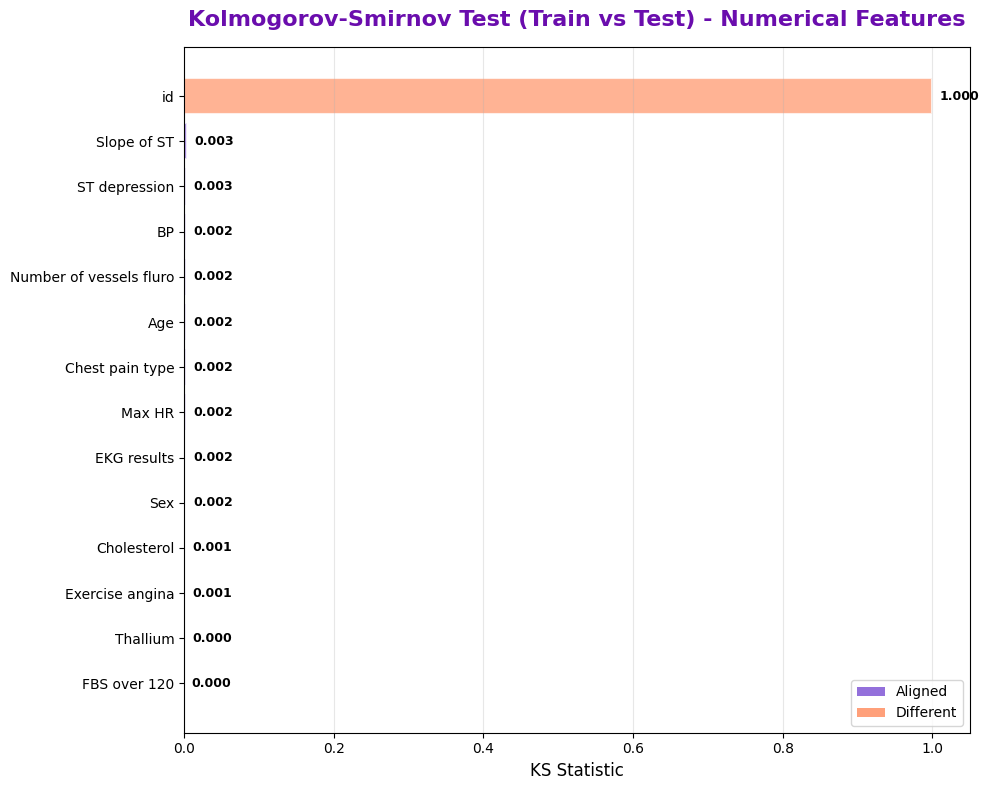

In [34]:
from scipy import stats
from matplotlib.patches import Patch

# ---------------- KS TEST CALCULATION ----------------
ks_results = []

for col in NUMS:
    stat, p_value = stats.ks_2samp(train_df[col], test_df[col])
    
    ks_results.append({
        'Feature': col,
        'KS_Statistic': stat,
        'P_Value': p_value,
        'Same_Distribution': 'Yes' if p_value > 0.05 else 'No',
        'Interpretation': 'Aligned' if p_value > 0.05 else 'Different'
    })

ks_df = pd.DataFrame(ks_results).sort_values('KS_Statistic', ascending=True)
display(ks_df.style.background_gradient(subset=['P_Value'], cmap='RdYlGn'))

aligned_count = ks_df[ks_df['Same_Distribution'] == 'Yes'].shape[0]
print(f"\n✓ Aligned Features (Train vs Test): {aligned_count}/{len(NUMS)}")
if aligned_count / len(NUMS) > 0.8:
    print("✓ Train and Test distributions are well-aligned.")
else:
    print("⚠ Significant distribution differences detected.")
fig, ax = plt.subplots(figsize=(10, 8))

# Light colors: purple for aligned, red for different
colors = ['#9370DB' if row['Same_Distribution']=='Yes' else '#FFA07A' for _, row in ks_df.iterrows()]

# Horizontal bar chart
bars = ax.barh(
    ks_df['Feature'], 
    ks_df['KS_Statistic'], 
    color=colors, alpha=0.8, edgecolor='white', linewidth=1.5
)

# Annotate KS statistic values
for i, stat in enumerate(ks_df['KS_Statistic']):
    ax.text(stat + 0.01, i, f'{stat:.3f}', va='center', ha='left', fontsize=9, fontweight='bold')

# Labels, title, grid
ax.set_xlabel('KS Statistic', fontsize=12)
ax.set_title('Kolmogorov-Smirnov Test (Train vs Test) - Numerical Features', 
             fontsize=16, fontweight='bold', color='#6A0DAD', pad=15)
ax.grid(axis='x', alpha=0.3)

# Legend
legend_elements = [Patch(facecolor='#9370DB', label='Aligned'),
                   Patch(facecolor='#FFA07A', label='Different')]
ax.legend(handles=legend_elements, fontsize=10)

plt.tight_layout()
plt.show()

## Key Insights & Recommendations

SUMMARY STATISTICS COMPARISON (Train vs Test)


,Feature,Train_Mean,Test_Mean,Train_Std,Test_Std,Train_Median,Test_Median,Mean_Diff_%
0,id,314999.500000,764999.500000,181865.479132,77942.430678,314999.500000,764999.500000,142.857370
12,Number of vessels fluro,0.451040,0.454800,0.798549,0.801270,0.000000,0.000000,0.833700
9,Exercise angina,0.273725,0.274656,0.445870,0.446341,0.000000,0.000000,0.339815
7,EKG results,0.981660,0.978493,0.998783,0.998686,0.000000,0.000000,0.322691
10,ST depression,0.716028,0.718082,0.948472,0.947417,0.100000,0.100000,0.286923
11,Slope of ST,1.455871,1.459356,0.545192,0.546186,1.000000,1.000000,0.239316
2,Sex,0.714735,0.716315,0.451541,0.450787,1.000000,1.000000,0.221046
6,FBS over 120,0.079987,0.080052,0.271274,0.271374,0.000000,0.000000,0.080701
3,Chest pain type,3.312752,3.315107,0.851615,0.851762,4.000000,4.000000,0.071090
4,BP,130.497433,130.555089,14.975802,15.007908,130.000000,130.000000,0.044181



⚠ Features with >5% mean difference may indicate distribution shift.


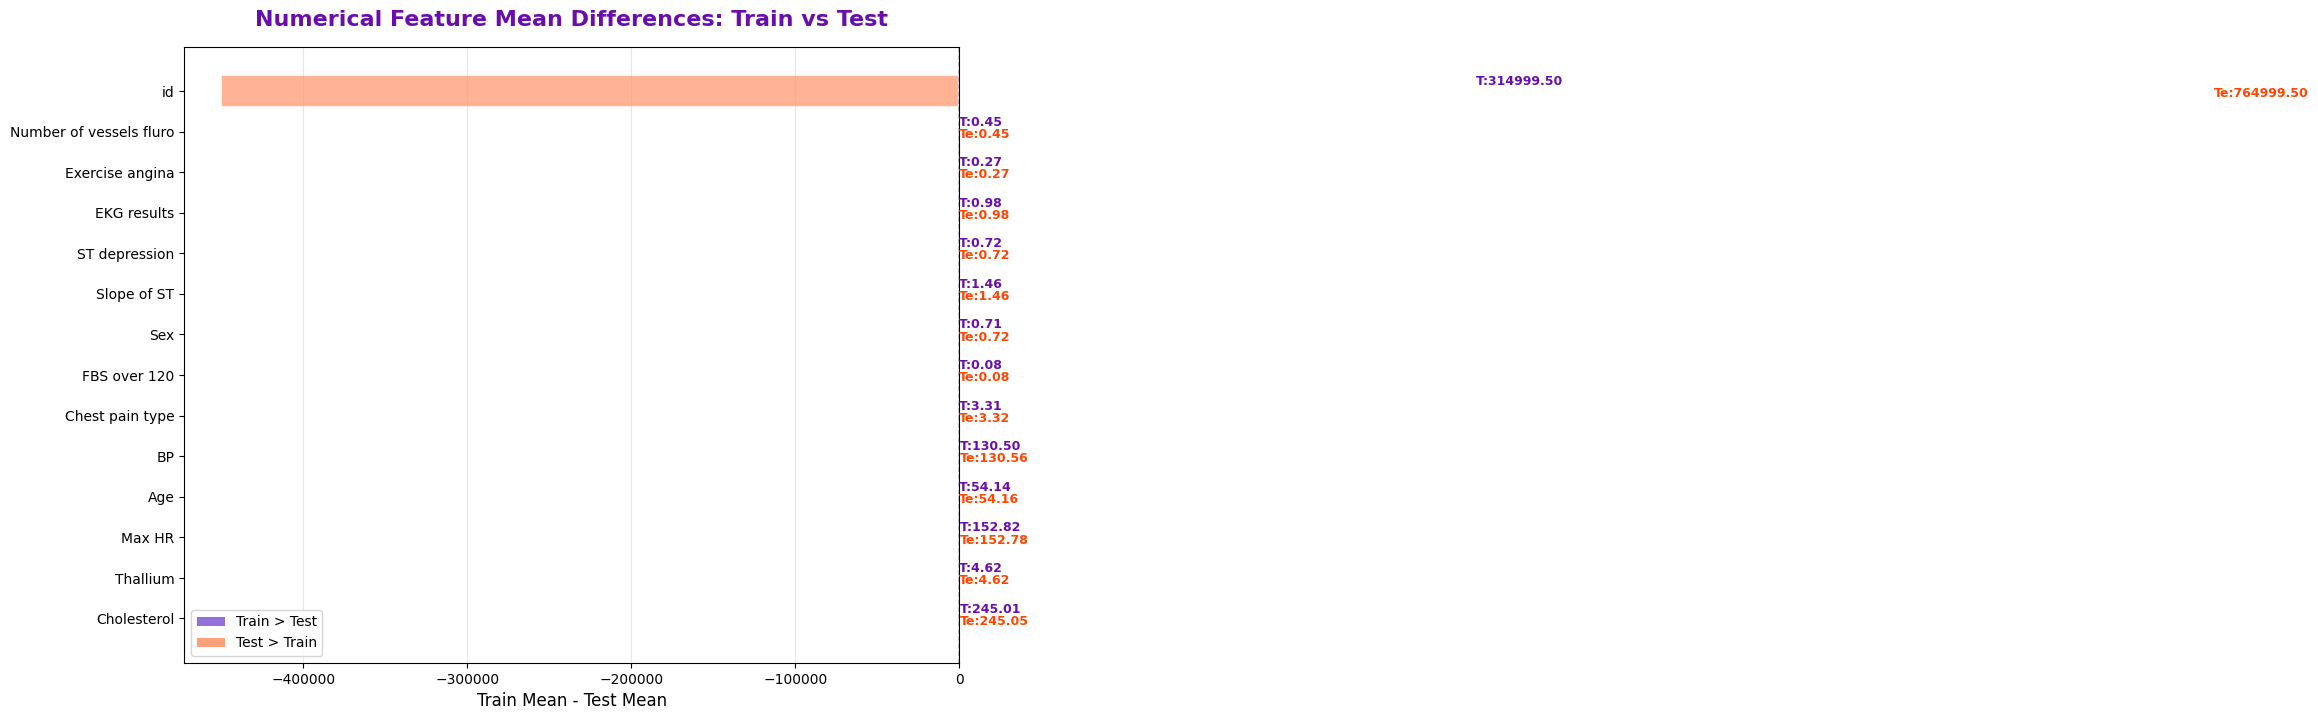

In [35]:
summary_comparison = pd.DataFrame()

for col in NUMS:
    summary_comparison = pd.concat([summary_comparison, pd.DataFrame({
        'Feature': [col],
        'Train_Mean': [train_df[col].mean()],
        'Test_Mean': [test_df[col].mean()],
        'Train_Std': [train_df[col].std()],
        'Test_Std': [test_df[col].std()],
        'Train_Median': [train_df[col].median()],
        'Test_Median': [test_df[col].median()],
        'Mean_Diff_%': [abs(train_df[col].mean() - test_df[col].mean()) / train_df[col].mean() * 100]
    })], ignore_index=True)

summary_comparison = summary_comparison.sort_values('Mean_Diff_%', ascending=False)

print("="*80)
print("SUMMARY STATISTICS COMPARISON (Train vs Test)")
print("="*80)
display(summary_comparison.style.background_gradient(subset=['Mean_Diff_%'], cmap='YlOrRd'))
print("\n⚠ Features with >5% mean difference may indicate distribution shift.")

# ---------------- UNIQUE VISUALIZATION ----------------
summary_sorted = summary_comparison.sort_values('Mean_Diff_%', ascending=True)
fig, ax = plt.subplots(figsize=(10, 8))

# Compute differences: Train - Test
diff_values = summary_sorted['Train_Mean'] - summary_sorted['Test_Mean']

# Colors: light purple if Train > Test, light red if Test > Train
colors = ['#9370DB' if x > 0 else '#FFA07A' for x in diff_values]

bars = ax.barh(summary_sorted['Feature'], diff_values, color=colors, alpha=0.8, edgecolor='white', linewidth=1.5)

# Annotate mean values
for i, (train_val, test_val) in enumerate(zip(summary_sorted['Train_Mean'], summary_sorted['Test_Mean'])):
    ax.text(train_val, i + 0.15, f'T:{train_val:.2f}', color='#6A0DAD', fontsize=9, fontweight='bold')
    ax.text(test_val, i - 0.15, f'Te:{test_val:.2f}', color='#FF4500', fontsize=9, fontweight='bold')

# Reference line at 0
ax.axvline(0, color='black', linestyle='--', linewidth=1)

ax.set_xlabel('Train Mean - Test Mean', fontsize=12)
ax.set_title('Numerical Feature Mean Differences: Train vs Test', fontsize=16, fontweight='bold', color='#6A0DAD', pad=15)
ax.grid(axis='x', alpha=0.3)

# Legend
legend_elements = [
    Patch(facecolor='#9370DB', label='Train > Test'),
    Patch(facecolor='#FFA07A', label='Test > Train')
]
ax.legend(handles=legend_elements, fontsize=10)

plt.tight_layout()
plt.show()

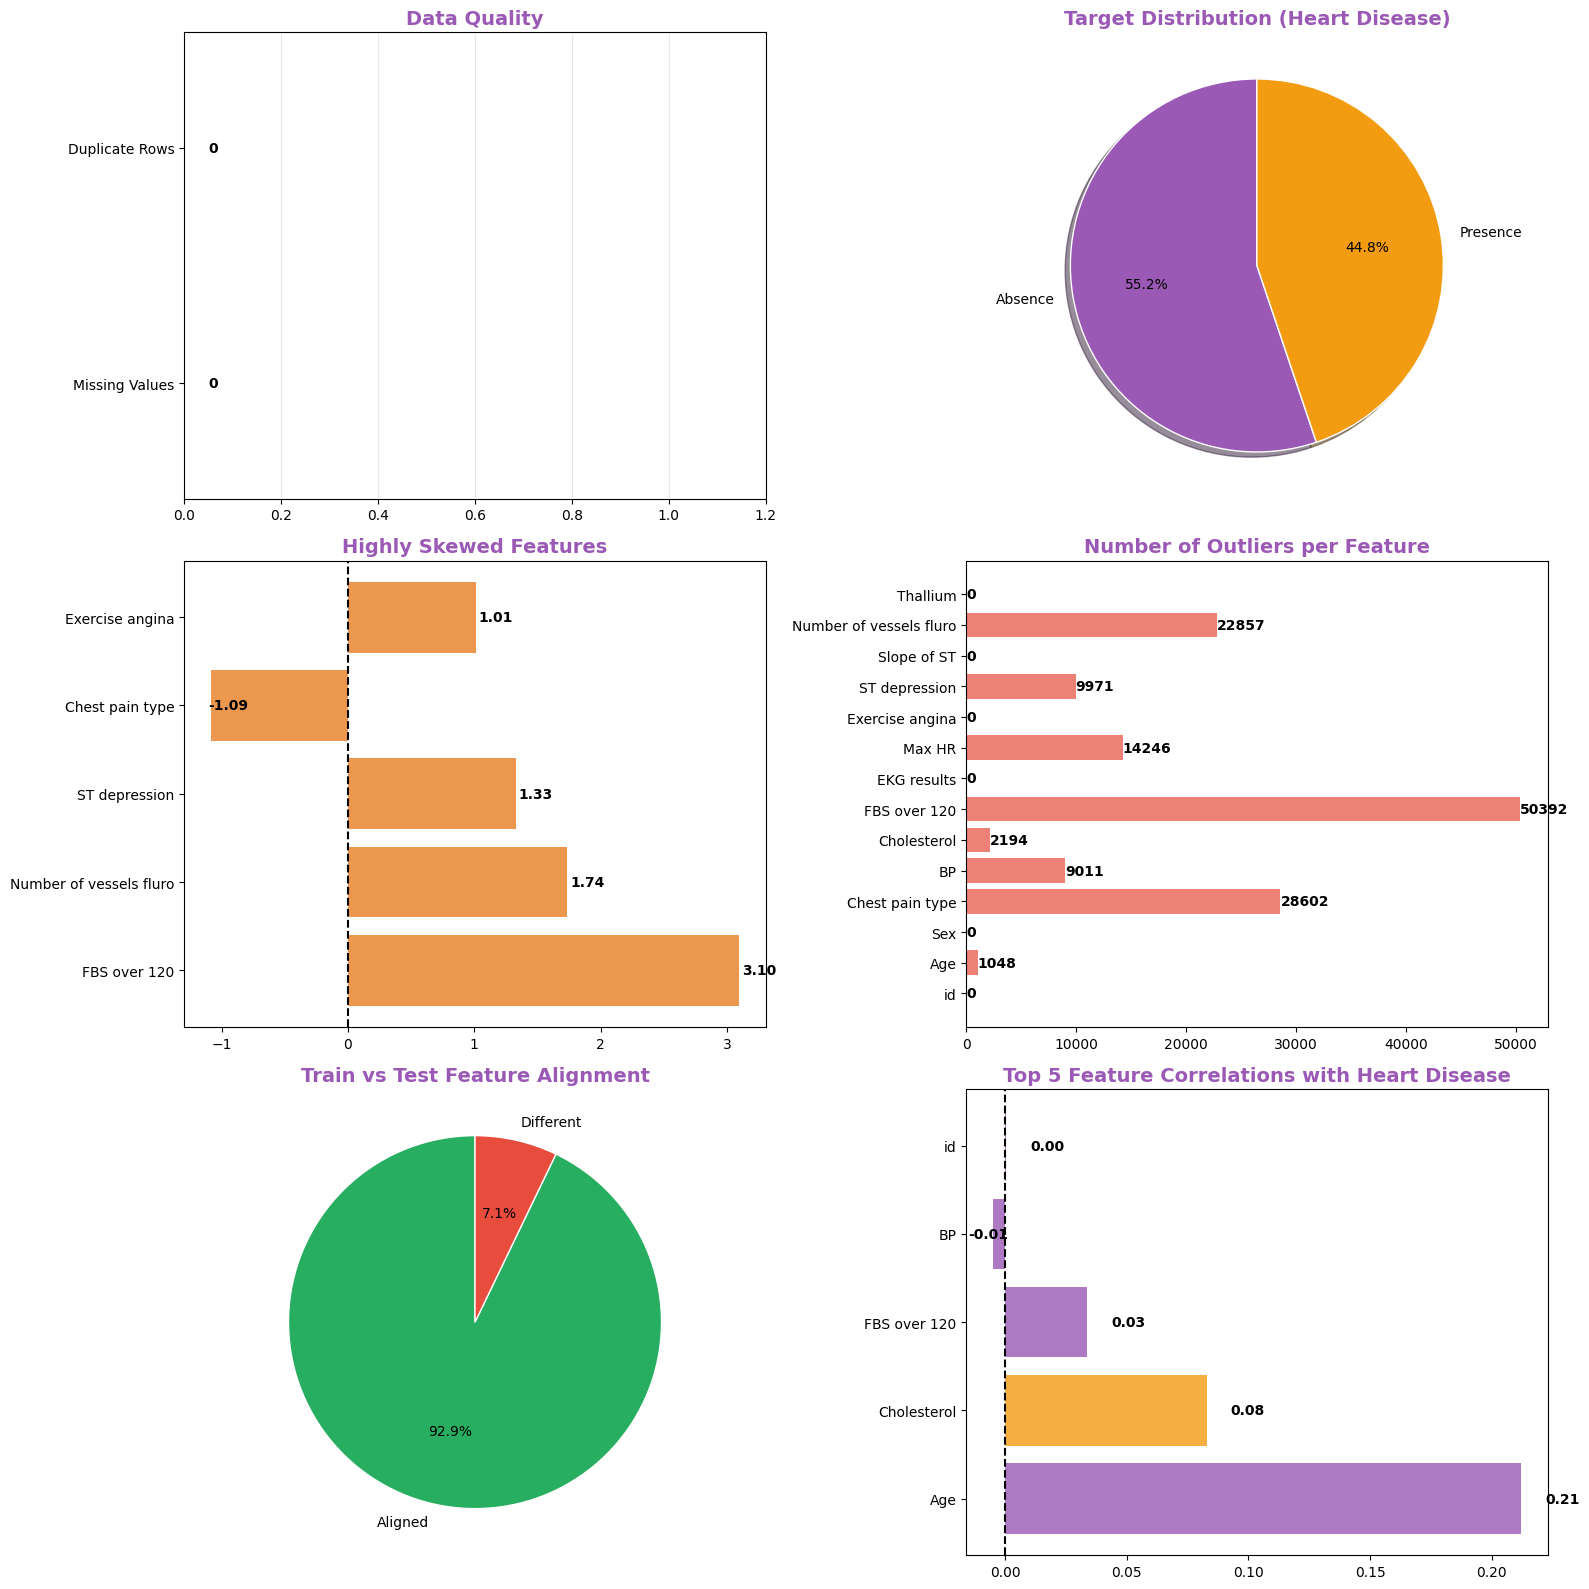

In [36]:
PRIMARY_COLOR = '#9b59b6'   # Purple
ACCENT_COLOR = '#f39c12'    # Orange
SUCCESS_COLOR = '#27ae60'   # Green
WARNING_COLOR = '#e67e22'   # Yellow-Orange
DANGER_COLOR = '#e74c3c'    # Red
LIGHT_BG = '#f5f5f5'


fig, axes = plt.subplots(3, 2, figsize=(16, 16))
axes = axes.flatten()

# 1️⃣ Data Quality
train_missing = train_df.isnull().sum()[train_df.isnull().sum() > 0]
train_duplicates = train_df.duplicated().sum()

axes[0].barh(
    ['Missing Values', 'Duplicate Rows'], 
    [train_missing.shape[0], train_duplicates],
    color=[DANGER_COLOR if train_missing.shape[0]>0 else SUCCESS_COLOR,
           DANGER_COLOR if train_duplicates>0 else SUCCESS_COLOR]
)
axes[0].set_title('Data Quality', fontsize=14, fontweight='bold', color=PRIMARY_COLOR)
axes[0].set_xlim(0, max([train_missing.shape[0], train_duplicates, 1])*1.2)
for i, val in enumerate([train_missing.shape[0], train_duplicates]):
    axes[0].text(val + 0.05, i, str(val), va='center', fontweight='bold')
axes[0].grid(axis='x', alpha=0.3)

# 2️⃣ Target Distribution
target_counts = train_df[TARGET].value_counts()
axes[1].pie(target_counts.values, labels=target_counts.index, autopct='%1.1f%%',
            colors=[PRIMARY_COLOR, ACCENT_COLOR], startangle=90, shadow=True, wedgeprops=dict(edgecolor='white'))
axes[1].set_title(f'Target Distribution ({TARGET})', fontsize=14, fontweight='bold', color=PRIMARY_COLOR)

# 3️⃣ Skewed Features
high_skew = skew_kurt_df[abs(skew_kurt_df['Skewness']) > 1]
axes[2].barh(high_skew['Feature'], high_skew['Skewness'], color=WARNING_COLOR, alpha=0.8)
axes[2].set_title('Highly Skewed Features', fontsize=14, fontweight='bold', color=PRIMARY_COLOR)
axes[2].axvline(0, color='black', linestyle='--')
for i, val in enumerate(high_skew['Skewness']):
    axes[2].text(val + np.sign(val)*0.02, i, f'{val:.2f}', va='center', fontweight='bold')

# 4️⃣ Outliers per Feature
outlier_counts = []
for col in NUMS:
    q1 = train_df[col].quantile(0.25)
    q3 = train_df[col].quantile(0.75)
    iqr = q3 - q1
    outliers = ((train_df[col] < q1 - 1.5*iqr) | (train_df[col] > q3 + 1.5*iqr)).sum()
    outlier_counts.append(outliers)

axes[3].barh(NUMS, outlier_counts, color=DANGER_COLOR, alpha=0.7)
axes[3].set_title('Number of Outliers per Feature', fontsize=14, fontweight='bold', color=PRIMARY_COLOR)
for i, val in enumerate(outlier_counts):
    axes[3].text(val + 0.5, i, str(val), va='center', fontweight='bold')

# 5️⃣ Train-Test Alignment (KS Test)
aligned = ks_df[ks_df['Same_Distribution']=='Yes'].shape[0]
misaligned = len(NUMS) - aligned
axes[4].pie([aligned, misaligned], labels=['Aligned', 'Different'], autopct='%1.1f%%',
            colors=[SUCCESS_COLOR, DANGER_COLOR], startangle=90, wedgeprops=dict(edgecolor='white'))
axes[4].set_title('Train vs Test Feature Alignment', fontsize=14, fontweight='bold', color=PRIMARY_COLOR)

# 6️⃣ Top Correlated Features with Target
top_corr = target_corr.head(5)
colors = [PRIMARY_COLOR if x>0 else ACCENT_COLOR for x in top_corr.values]
axes[5].barh(top_corr.index[::-1], top_corr.values[::-1], color=colors, alpha=0.8)
axes[5].set_title(f'Top 5 Feature Correlations with {TARGET}', fontsize=14, fontweight='bold', color=PRIMARY_COLOR)
axes[5].axvline(0, color='black', linestyle='--')
for i, val in enumerate(top_corr.values[::-1]):
    axes[5].text(val + np.sign(val)*0.01, i, f'{val:.2f}', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

In [37]:
np.random.seed(42)
y_pred = np.random.randint(0, 2, size=len(test_df))  # 0 or 1 predictions

# Create submission DataFrame
submission = pd.DataFrame({
    'id': test_df['id'],       # use the ID column in test_df
    'Heart Disease': y_pred    # predicted labels
})

submission.head()

,id,Heart Disease
0,630000,0
1,630001,1
2,630002,0
3,630003,0
4,630004,0


## thank you..pls upvote!!!!!